#  Exploratory Data Analysis and Data Preparation
## Hypothesis testing
## Data profiling & EDA
## 'customer retention & attrition' and 'customer survival rate' analysis

# Dataset Access Tests

These tests will allow you to quickly verify that you have access to S3 buckets, and serve as examples for loading data from S3 into pandas DataFrames.

## Environment Variables
If you created this notebook using the cfn-student-setup.yml template from edu-sagemaker-course, the names of the buckets are stored in environment variables for your convenience. If not, these variables may be empty and won't be usable, in which case you should change dataset_bucket, course_bucket, and shared_bucket to their respective bucket names.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, Excel file I/O (e.g. pd.read_excel)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly as py
#plotly.offline doesn't push your charts to the clouds
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.offline.init_notebook_mode()
import boto3
import collections

In [2]:
import os

print ('=== ENVIRONMENT VARIABLES ===')
print ('DATASET_BUCKET: {}'.format(os.environ.get('DATASET_BUCKET')))
print ('COURSE_BUCKET: {}'.format(os.environ.get('COURSE_BUCKET')))
print ('SHARED_BUCKET: {}'.format(os.environ.get('SHARED_BUCKET')))
print ('=== --------------------- ===')

# If the OS environment variables above return empty or incorrect values, set these variables with the correct bucket names.
dataset_bucket = os.environ.get('DATASET_BUCKET', 'cmu-dshs-diabetes-data')
course_bucket = os.environ.get('COURSE_BUCKET', '046355044787-edu-sagemaker-instructor-us-east-1-course')
shared_bucket = os.environ.get('SHARED_BUCKET', '046355044787-edu-sagemaker-instructor-us-east-1-shared')

=== ENVIRONMENT VARIABLES ===
DATASET_BUCKET: cmu-dshs-diabetes-data
COURSE_BUCKET: 046355044787-edu-sagemaker-instructor-us-east-1-course
SHARED_BUCKET: 046355044787-edu-sagemaker-instructor-us-east-1-shared
=== --------------------- ===


## List Bucket Objects
The code below uses the AWS Python SDK (boto3) to retrieve a list of objects in each bucket. 

**Note**: If you receive an AccessDenied error for any of these buckets, it is because you do not have read permission. Contact the bucket owner (i.e. the instructor) with your AWS Account ID so they can verify you've been granted access to the bucket(s).

# Task 1 : Ten hypotheses to test about relationships between potential predictors and diabetes patient engagement 

## Hypothesis 1: 
### An association between social support and A1C
### Expectation: Presence of social support is associated with lower A1C levels. Lack of social support is associated with higher A1C levels.
### Note : Social support is binary
### A1C is continuous (CATDMHBA1C, HBA1C, HbA1c, EHBA1C, EHBA1C6, EHBA1C12)

## Hypothesis 2:
### An association between attendance to nutrition visit over time (atendioNutricion) and lower A1C: 
### Expectation: Attending visit (1)  is associated with lower A1C levels. Not attending visit (0)  is associated with higher A1C levels.

## Hypothesis 3:
### An association between attendance to the nutritional diagnosis (DiagnosticoNutricional) and A1C 
### Expectation: Attending the nutritional diagonsis regularly is associated with lower A1C levels. Not visiting nutritional diagonsis regularly  is associated with higher A1C levels

## Hypothesis 4:
### An association between who prepares the meals (QuienPreparaAlimentos) and nutritional diagnosis (DiagnosticoNutricional) as well as A1C
### Expectation: Patients who have direct family members to prepare meals for them may show lower A1C levels and vice-versa

## Hypothesis 5:
### An association between beverage type and quantity and A1c value -- options for beverages include coffee (Cafe), coffee type (CafeTipo), coffee amount (CafeCantidad), refreshments (Refrescos), refreshment type (RefrescosTipo), refreshment amount (RefrescosCantidad), water (Agua), water amount (AguaCantidad)
### Expectation: To see a trend in the type of beverage and the A1C levels of the patients

## Hypothesis 6:
### An association between the occupation of the patient and A1C levels
### Expectation: Less active jobs may show higher A1C levels and vice-versa

## Hypothesis 7:
### An association between BMI and A1C 
### Expectation: Patients with higher BMI may show higher A1C levels and vice-versa

## Hypothesis 8:
### An association between clinic's attention(time-in and time-out) (HoraEntrada and HoraSalida) and Membership renewals (AbonoMembresiaInscripcion)
### Expectation: Patients who spent a lot of time in the clinic may be more likely to renew their membership and vice-versa

## Hypothesis 9: 
### An association between alcohol and tobacco consumption and patient engagement
### Expectation: Patients who consume alcohol and tobacco (Alcohol and Tabaco) may be more likely to have health issues and likely to renew their memberships (AbonoMembresiaInscripcion) 

## Hypothesis 10:
### An association between family income-level and patient engagement. 
### Expectation: People with higher family income-level may be more motivated to be engaged with the clinical treatment

## Loading data into Pandas
This is a quick example of how you can load a dataset into a Pandas Data Frame, directly from S3. To do this, you'll need to set the 's3_key' variable to the path of the file in the Dataset bucket. When loading data from S3, you'll use the s3 prefix.

*Note*: The code below assumes you will be loading a csv file. The Pandas library can import many different data formats natively: https://pandas.pydata.org/pandas-docs/stable/reference/io.html. 


In [3]:
#example case of loading data

In [3]:
import pandas as pd
import numpy as np
s3_bucket = os.environ.get('DATASET_BUCKET', 'cmu-dshs-diabetes-data')
s3_key = 'Balance - Tablas (Parte 1 ) pacientes.csv'

dataframe = pd.read_csv('s3://{}/{}'.format(s3_bucket, s3_key), encoding = 'ISO-8859-1')
#Get the first 5 rows of the CSV
display(dataframe.head(5))

dataframe.info()



IdPaciente  AnioNacimiento  IdConsultorio     Ciudad      Estado Sexo  \
0           1          1928.0              1  GUADALUPE  NUEVO LEÓN    H   
1           2          1971.0              1  GUADALUPE  NUEVO LEÓN    H   
2           3          1943.0              1  GUADALUPE  NUEVO LEÓN    M   
3           4          1976.0              1   SANTIAGO  NUEVO LEÓN    H   
4           5          1958.0              1  GUADALUPE  NUEVO LEÓN    H   

  EstadoCivil   Religion              Ocupacion      Escolaridad      Fecha  \
0    SOLTERÍA   CATOLICA                ALBAÑIL          NINGUNA  2/19/2013   
1  MATRIMONIO        NaN  INSTALACION MECANICA   LEER Y ESCRIBIR  2/19/2013   
2  MATRIMONIO  CATOLICA                   HOGAR     PREPARATORIA  2/19/2013   
3    SOLTERÍA   CATOLICA               EMPLEADO     LICENCIATURA  2/19/2013   
4  MATRIMONIO   CATÓLICA                 CASADO     PREPARATORIA  2/19/2013   

       Hora  IdInteresado  ProgramaRecomendados       SeguridadSocial  \
0  13:55:23         16432                     0                  imss   
1  13:55:23         16433                     0                  IMSS   
2  13:55:23         16434                     0                  IMSS   
3  13:55:23         16435                     0               PRIVADO   
4  13:55:23         16436                     1  NO SEGURIDAD SOCIAL    

   RecordarCita  EstadioValor  Estadio  
0             1           NaN      NaN  
1             1           NaN      NaN  
2             1           8.8      5.0  
3             1           NaN      NaN  
4             1           NaN      NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14855 entries, 0 to 14854
Data columns (total 18 columns):
IdPaciente              14855 non-null int64
AnioNacimiento          14813 non-null float64
IdConsultorio           14855 non-null int64
Ciudad                  14807 non-null object
Estado                  14812 non-null object
Sexo                    14714 non-null object
EstadoCivil             14648 non-null object
Religion                5186 non-null object
Ocupacion               14236 non-null object
Escolaridad             5076 non-null object
Fecha                   14855 non-null object
Hora                    14855 non-null object
IdInteresado            14855 non-null int64
ProgramaRecomendados    14855 non-null int64
SeguridadSocial         14488 non-null object
RecordarCita            14855 non-null int64
EstadioValor            3701 non-null float64
Estadio                 3701 non-null float64
dtypes: float64(3), int64(5), object(10)
memory usage: 2.0+ MB


In [4]:
bucketname = "cmu-dshs-diabetes-data"
s3 = boto3.resource('s3')
my_bucket = s3.Bucket(bucketname)
for my_bucket_object in my_bucket.objects.all():
    print(my_bucket_object)

s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ) pacientes.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 1 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 2 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='Balance - Tablas (Parte 3 ).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='DataDictionary version 2.xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='I Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='II Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='III Datos CMU (ENC).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='IV Datos CMU (BAL).xlsx')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='notasevolucionpsic.csv')
s3.ObjectSummary(bucket_name='cmu-dshs-diabetes-data', key='psicologiasesion1.csv')


In [5]:
# Read the patient information dataset 
task2_III_Datos_df_key ='III Datos CMU (ENC).xlsx'
task2_III_Datos_df = pd.read_excel('s3://{}/{}'.format(bucketname, task2_III_Datos_df_key),  encoding = 'ISO-8859-1',parse_dates=['Fecha'] )
task2_IV_Datos_df_key ='IV Datos CMU (BAL).xlsx'
task2_IV_Datos_df = pd.read_excel('s3://{}/{}'.format(bucketname, task2_IV_Datos_df_key),  encoding = 'ISO-8859-1',parse_dates=['Fecha'] )
task3_IV_Datos_df_key ='IV Datos CMU (BAL).xlsx'
task3_IV_Datos_df = pd.read_excel('s3://{}/{}'.format(bucketname, task3_IV_Datos_df_key),  encoding = 'ISO-8859-1',parse_dates=['Fecha'] )
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  encoding = 'ISO-8859-1',parse_dates=['Fecha'] )

## Printing out the data dictionaries

In [7]:
DataDictionary_df_key ='DataDictionary version 2.xlsx'
DataDictionary_df_key_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key),  encoding = 'ISO-8859-1' )
DataDictionary_df_key_df

Subject  Totals  Structured  Unstructured
0     controlvital      15        15.0           NaN
1      evoluciones      34        30.0           4.0
2        consultas      10        10.0           NaN
3  bitacoravisitas       8         8.0           NaN
4               hc     116         NaN           NaN
5    retinografias      64         NaN           NaN
6     laboratorias      53         NaN           NaN

In [8]:
controlvital_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'controlvital', encoding = 'ISO-8859-1' )
controlvital_df

Field                 Description
0   IdControlVital              Id Primary Key
1       IdPaciente                  Patient Id
2            Fecha               Creation date
3             Hora               Creation time
4               GC     Capillary blood glucose
5      Temperatura            Body temperature
6               FC                  Heart rate
7               FR         Breathing frequency
8             Peso                      Weight
9            Talla                      Height
10              CC         Waist circumference
11         Usuario                     User Id
12    HADiastolica    Diastolic blood pressure
13     HASistolica     Systolic blood pressure
14         FechaCC  Waist circumference : Date

In [8]:
evoluciones_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'evoluciones', encoding = 'ISO-8859-1' )
evoluciones_df

Field  \
0                    IdEvolucion   
1                     IdPaciente   
2                          Fecha   
3                           Hora   
4   ReporteEventosComplicaciones   
5                  NotaEvolucion   
6           ImpresionDiagnostica   
7                     Pronostico   
8                        Usuario   
9                    Temperatura   
10                            FC   
11                            FR   
12                          Peso   
13                         Talla   
14                            CC   
15                  HADiastolica   
16                   HASistolica   
17          PlanTratamientoNotas   
18                   FolioReceta   
19                   FechaReceta   
20                 UsuarioReceta   
21       IdConsultorioCreacionEv   
22       HipoglucemiaSintomatica   
23       HipoglucemiaDocumentada   
24              TipoHipoglucemia   
25                            AP   
26                            EC   
27                            IA   
28                            AR   
29                            IC   
30                            AC   
31                            DM   
32                        AnioDM   
33                        TipoDM   

                                          Description               Values  
0                                      Id Primary key                  NaN  
1                                          Patient id                  NaN  
2                                       Creation date                  NaN  
3                                       Creation time                  NaN  
4   Report of medical complications or related eve...                  NaN  
5                 Medical evolution notes : Free text                  NaN  
6            Medical diagnosis impression : Free text                  NaN  
7   Medical prognosis : Good or Reserved or Bad fo...    estatuspronostico  
8                        Whom captured data : User Id                  NaN  
9                                    Body temperature                  NaN  
10                                         Heart rate                  NaN  
11                                Breathing frequency                  NaN  
12                                             Weight                  NaN  
13                                             Height                  NaN  
14                                Waist circumference                  NaN  
15                           Diastolic blood pressure                  NaN  
16                            Systolic blood pressure                  NaN  
17                 Medical treatment plan : Free text                  NaN  
18                                Prescription number                  NaN  
19                                  Prescription date                  NaN  
20                               Prescription user id                  NaN  
21                                          Branch id                  NaN  
22   Symptomatic hypoglycemia : Boolean value (1=Yes)                  NaN  
23    Documented hypoglycemia : Boolean value (1=Yes)                  NaN  
24  Type of hypoglycemia : Numeric value (1=Slight...  estatushipoglucemia  
25            Angina pectoris : Boolean value (1=Yes)                  NaN  
26     Coronary heart disease : Boolean value (1=Yes)                  NaN  
27  Acute myocardial infarction : Boolean value (1...                  NaN  
28                 Arrhythmia : Boolean value (1=Yes)                  NaN  
29              Heart failure : Boolean value (1=Yes)                  NaN  
30  Vascular brain accident (Stroke) : Boolean val...                  NaN  
31          Diabetes Mellitus : Boolean value (1=Yes)                  NaN  
32                 Diabetes Mellitus : Diagnosis Year                  NaN  
33  Diabetes Mellitus Types : (TIPO 1=Type 1, TIPO...      estatusdiabetes

In [10]:
consultas_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'consultas', encoding = 'ISO-8859-1' )
consultas_df

Field                                        Description
0     IdConsulta                                     Id Primary key
1        Usuario                                            User id
2     IdPaciente                                         Patient id
3  IdConsultorio                                          Branch id
4          Fecha                          clinic´s attention : date
5    HoraEntrada                     clinic´s attention : time (in)
6     HoraSalida                    clinic's attention : time (out)
7           Area  clinic's attention : area (medical, nutrition,...
8        Cerrada  clinic's attention : Boolean value 1=Closed (i...
9     IdAtencion                    Id Clinic´s automated attention

In [11]:
bitacoravisitas_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'bitacoravisitas', encoding = 'ISO-8859-1' )
bitacoravisitas_df

Field                                        Description
0     IdBitacora                                     Id Primary key
1  IdConsultorio                                          Branch id
2     IdPaciente                                         Patient id
3          Fecha                                      Creation date
4           Hora                                      Creation time
5           Area  Patient's visit area record : Available areas ...
6           Tipo                                            obviate
7        Usuario              Patient's visit area record : User id

In [12]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
hc_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'hc', encoding = 'ISO-8859-1' )
hc_df

Field  \
0                        IdPaciente   
1                             Fecha   
2                              Hora   
3                             AHFDM   
4                             AHFHA   
5                             AHFMP   
6                             AHFCA   
7                   AHFDislipidemia   
8                          AHFOtros   
9                    AHFOtrosCuales   
10                          Alcohol   
11            AlcoholCantidadTiempo   
12                           Tabaco   
13             TabacoCantidadTiempo   
14                     Psicoactivas   
15       PsicoactivasCantidadTiempo   
16                            APPDM   
17               APPDMClasificacion   
18                        APPDMAnio   
19                 APPDMTratamiento   
20               APPDMFarmacologico   
21                            APPVC   
22               APPVCClasificacion   
23                        APPVCAnio   
24                 APPVCTratamiento   
25                    APPNeuropatia   
26       APPNeuropatiaClasificacion   
27                APPNeuropatiaAnio   
28         APPNeuropatiaTratamiento   
29                      APPCatarata   
30         APPCatarataClasificacion   
31                  APPCatarataAnio   
32           APPCatarataTratamiento   
33                  APPDislipidemia   
34     APPDislipidemiaClasificacion   
35              APPDislipidemiaAnio   
36       APPDislipidemiaTratamiento   
37                            APPVP   
38               APPVPClasificacion   
39                        APPVPAnio   
40                 APPVPTratamiento   
41                            APPER   
42               APPERClasificacion   
43                        APPERAnio   
44                 APPERTratamiento   
45                            APPHA   
46               APPHAClasificacion   
47                        APPHAAnio   
48                 APPHATratamiento   
49                   APPRetinopatia   
50      APPRetinopatiaClasificacion   
51               APPRetinopatiaAnio   
52        APPRetinopatiaTratamiento   
53                      APPGlaucoma   
54         APPGlaucomaClasificacion   
55                  APPGlaucomaAnio   
56           APPGlaucomaTratamiento   
57                     APPVCerebral   
58        APPVCerebralClasificacion   
59                 APPVCerebralAnio   
60          APPVCerebralTratamiento   
61                      APPObesidad   
62         APPObesidadClasificacion   
63                  APPObesidadAnio   
64           APPObesidadTratamiento   
65                   APPQuirurgicos   
66        APPQuirurgicosNotaGeneral   
67                     APPAlergicos   
68          APPAlergicosNotaGeneral   
69                       AGOMenarca   
70                           AGOFUM   
71                           AGOMPF   
72                        AGOPartos   
73                      AGOCesareas   
74                       AGOAbortos   
75                        AGOGestas   
76                            AGODG   
77                   AGOMacrosomico   
78                      Temperatura   
79                               FC   
80                               FR   
81                             Peso   
82                            Talla   
83                               CC   
84                      Suplementos   
85               Suplementos_cuales   
86                 AvanceEnfermedad   
87                IASCardiovascular   
88                  IASRespiratorio   
89              IASGastrointestinal   
90                IASGenitourinario   
91         IASHematologicoLinfatico   
92                     IASEndocrino   
93              IASMuscoesqueletico   
94                      IASNervioso   
95                   IASPielMucosas   
96                EFHabitusExterior   
97                   EFCabezaCuello   
98                          EFTorax   
99                        EFAbdomen   
100                  EFExtremidades   
101           AuxiliaresDiagnostico   
102  Principi

In [13]:
retinografias_df = pd.read_excel('s3://{}/{}'.format(bucketname, DataDictionary_df_key) , 'retinografias', encoding = 'ISO-8859-1' )
retinografias_df

Field                        Description
0               IdRetinografia                              Id PK
1                   IdPaciente                         Patient ID
2                      Usuario                        Input User 
3                        Fecha                               Date
4                         Hora                               Time
5                       PDF_ER               Test Result Verbosed
6                       PDF_IQ             Image quality Verbosed
7                       PDF_RD          Right Retinopaty verbosed
8                       PDF_RI           Left Retinopaty verbosed
9                       PDF_AC          Additional Notes verbosed
10                     PDF_REC       Recomendation notes verbosed
11                        ERER                       Test Results
12                      ERER_C                 Test Results Notes
13                          IQ                      Image quality
14                       IQA_C                Image quality Notes
15                      IQIASP                        Small pupil
16                      IQIACT                      Catarat Image
17                      IQIABL                      Blurred image
18                      IQIACO              Opacity of the cornea
19                      IQIAFI                           Fixation
20                      IQIA_C           Notes on Inacurate Image
21                          RR                Retinopathy (Right)
22                      RRDRMN             Mild non-proliferative
23                     RRDRMNP         Moderate non-proliferative
24                      RRDRSN           Severe non-proliferative
25                      RRDRPR                      Proliferative
26                     RRDPPME             Probable macular edema
27                     RRDPPLT           Previous laser treatment
28                      RRDP_C                              Notes
29                        RR_C          Retinopathy (Right) Notes
30                      RROFMD               Macular degeneration
31                      RROFCA                            Catarat
32                      RROFGS              Suspicion of Glaucoma
33                      RROFNE                              Nevus
34                      RROFHR                    Retinopathy HTN
35                      RROFDR                             Drusen
36                      RROFVO                 Vascular occlusion
37                      RROFCH                    Chorioretinitis
38                      RROF_C            Another foundings notes
39                       RR_GC  Retinopathy (Right) General Notes
40                          RI                 Retinopathy (Left)
41                      RIDRMN             Mild non-proliferative
42                     RIDRMNP         Moderate non-proliferative
43                      RIDRSN           Severe non-proliferative
44                      RIDRPR                      Proliferative
45                     RIDPPME             Probable macular edema
46                     RIDPPLT           Previous laser treatment
47                      RIDP_C                              Notes
48                        RI_C           Retinopathy (Left) Notes
49                      RIOFMD               Macular degeneration
50                      RIOFCA                            Catarat
51                      RIOFGS              Suspicion of Glaucoma
52                      RIOFNE                              Nevus
53                      RIOFHR                    Retinopathy HTN
54                      RIOFDR                             Drusen
55                      RIOFVO                 Vascular occlusion
56                      RIOFCH                    Chorioretinitis
57                      RIOF_C            Another foundings notes
58                       RI_GC   Retinopathy (Left) General Notes
59      ComentariosAdicionales                   Additional Notes

# Task - 2 : To perform profiling on III and IV Datos by displaying the number of records and features in each of the spreadsheets of the files, for each field, the format of the data, units and range of values, summary statistics for numeric data(performed for categorical as well). Created data visualizations to understand the distribution and range of values and to spot the outliers.

### Data file - spreadsheet on which profiling has been performed
III Datos CMU (ENC) - encuestas_servicios--surveys_ services  

III Datos CMU (ENC) - config_calificaciones -- configuration_qualifications

IV Datos CMU (BAL) - evoluciones -- evolutions

IV Datos CMU (BAL) - estatusrazonesnocompro_n2 --status reasons for not buying n2

IV Datos CMU (BAL) - estatusrazonesnocompro -- status reasons for not buying

## III Datos CMU (ENC) dataset encuestas_servicios spreadsheet

In [9]:
#surveys_ services

In [14]:
task2_III_Datos_df_key ='III Datos CMU (ENC).xlsx'
task2_III_Datos_df_encuestas_servicios = pd.read_excel('s3://{}/{}'.format(bucketname, task2_III_Datos_df_key), 'encuestas_servicios', encoding = 'ISO-8859-1')
task2_III_Datos_df_encuestas_servicios 

IdEncuestaServicio IdEncuesta  IdConsultorio  IdPaciente  \
0                      2        ESS              5        5942   
1                      3        ESS              5       10570   
2                      4        ESS              5        5735   
3                      5        ESS              5       10225   
4                      6        ESS              5       10485   
5                      7        ESS              5       10708   
6                      8        ESS              5        5232   
7                      9        ESS              5        8077   
8                     10        ESS              5       10839   
9                     11        ESS              5        7579   
10                    12        ESS              5        9233   
11                    13        ESS              5       10735   
12                    14        ESS              5        8093   
13                    15        ESS              5       10860   
14                    16        ESS              5        8207   
15                    17        ESS              5       10418   
16                    18        ESS              5        7162   
17                    19        ESS              5        7886   
18                    21        ESS              5        4889   
19                    22        ESS              5        6216   
20                    23        ESS              5        5859   
21                    24        ESS              5        5435   
22                    25        ESS              5       10907   
23                    26        ESS              5       10925   
24                    27        ESS              5        9085   
25                    28        ESS              5        9335   
26                    29        ESS              5           0   
27                    30        ESS              5       10991   
28                    31        ESS              5       11002   
29                    32        ESS              5        9390   
30                    33        ESS              5        8947   
31                    34        ESS              5        4304   
32                    35        ESS              5       11008   
33                    36        ESS              5        9456   
34                    37        ESS              5        8443   
35                    38        ESS              5       11141   
36                    39        ESS              5        8558   
37                    40        ESS              5        7209   
38                    41        ESS              5        9479   
39                    42        ESS              5       11055   
40                    43        ESS              5        6071   
41                    44        ESS              5        9508   
42                    45        ESS              5       11066   
43                    46        ESS              5        9454   
44                    47        ESS              5        8340   
45                    48        ESS              5       11200   
46                    49        ESS              5        7207   
47                    50        ESS              5        9416   
48                    51        ESS              5        7300   
49                    55        ESS              1       11212   
50                    56        ESS              1       11170   
51                    57        ESS              1         300   
52                    58        ESS              1        2357   
53                    60        ESS              1        9573   
54                    61        ESS              1        7152   
55                    62        ESS              1       11236   
56                    63        ESS              5           0   
57                    64        ESS              1       11136   
58                    65        ESS              1        8422   
59                    66        ESS           

In [15]:
# Number of records and features in the encuestas_servicios spreadsheet
print("Number of records (patients): ", task2_III_Datos_df_encuestas_servicios.shape[0], ", and Number of columns (features): ", task2_III_Datos_df_encuestas_servicios.shape[1])

Number of records (patients):  4565 , and Number of columns (features):  27


In [16]:
#Format of the data in III Datos CMU (ENC) dataset encuestas_servicios spreadsheet
task2_III_Datos_df_encuestas_servicios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4565 entries, 0 to 4564
Data columns (total 27 columns):
IdEncuestaServicio            4565 non-null int64
IdEncuesta                    4565 non-null object
IdConsultorio                 4565 non-null int64
IdPaciente                    4565 non-null int64
atendioRecepcion              4565 non-null object
calificaRecepcion             4565 non-null int64
atendioCV                     4565 non-null object
calificaCV                    4565 non-null int64
atendioNutricion              4565 non-null object
calificaNutricion             4565 non-null int64
atendioPsicologia             4565 non-null object
calificaPsicologia            4565 non-null int64
atendioMedico                 4565 non-null object
calificaMedico                4565 non-null int64
calificaInstalacionClinica    4565 non-null int64
Comentario                    578 non-null object
Sugerencia                    1013 non-null object
Felicitacion                  640 no

In [17]:
#number of null values in each column
task2_III_Datos_df_encuestas_servicios.isnull().sum()

IdEncuestaServicio               0
IdEncuesta                       0
IdConsultorio                    0
IdPaciente                       0
atendioRecepcion                 0
calificaRecepcion                0
atendioCV                        0
calificaCV                       0
atendioNutricion                 0
calificaNutricion                0
atendioPsicologia                0
calificaPsicologia               0
atendioMedico                    0
calificaMedico                   0
calificaInstalacionClinica       0
Comentario                    3987
Sugerencia                    3552
Felicitacion                  3925
anonima                          0
calificaRecomendacion            0
Fecha                            0
Hora                             0
usuario_encuesta                 0
atendioVentas                 1909
calificaVentas                1909
NoQuisoContestar                 0
sienteMejoria                 4565
dtype: int64

In [18]:
#Summary statisticis of numeric columns
task2_III_Datos_df_encuestas_servicios.describe().T

count          mean          std  min     25%  \
IdEncuestaServicio          4565.0   2317.328149  1325.419149  2.0  1172.0   
IdConsultorio               4565.0      3.253669     1.800784  1.0     1.0   
IdPaciente                  4565.0  10062.390142  3428.489759  0.0  8368.0   
calificaRecepcion           4565.0      3.591676     1.082577  0.0     4.0   
calificaCV                  4565.0      3.631544     1.024915  0.0     4.0   
calificaNutricion           4565.0      3.596276     1.117832  0.0     4.0   
calificaPsicologia          4565.0      0.307338     1.051876  0.0     0.0   
calificaMedico              4565.0      3.589704     1.115043  0.0     4.0   
calificaInstalacionClinica  4565.0      3.611610     0.931998  0.0     4.0   
anonima                     4565.0      0.725082     0.446522  0.0     0.0   
calificaRecomendacion       4565.0      3.739102     0.912503  0.0     4.0   
calificaVentas              2656.0      1.743223     1.947801  0.0     0.0   
NoQuisoContestar            4565.0      0.050602     0.219208  0.0     0.0   
sienteMejoria                  0.0           NaN          NaN  NaN     NaN   

                                50%      75%      max  
IdEncuestaServicio           2322.0   3464.0   4608.0  
IdConsultorio                   3.0      5.0      7.0  
IdPaciente                  10827.0  12550.0  15020.0  
calificaRecepcion               4.0      4.0      4.0  
calificaCV                      4.0      4.0      4.0  
calificaNutricion               4.0      4.0      4.0  
calificaPsicologia              0.0      0.0      4.0  
calificaMedico                  4.0      4.0      4.0  
calificaInstalacionClinica      4.0      4.0      4.0  
anonima                         1.0      1.0      1.0  
calificaRecomendacion           4.0      4.0      4.0  
calificaVentas                  0.0      4.0      4.0  
NoQuisoContestar                0.0      0.0      1.0  
sienteMejoria                   NaN      NaN      NaN

In [19]:
task2_III_Datos_df_encuestas_servicios.describe(exclude =[np.number]).T

count unique                               top  freq  \
IdEncuesta         4565      1                               ESS  4565   
atendioRecepcion   4565     20  d383b71f075caa4670e99d83e46e26d6   565   
atendioCV          4565     47  788070f73bacb96328c96b836dc3ff6b   300   
atendioNutricion   4565     30  6a67fd053d630bb6c925f1d74184aa02   688   
atendioPsicologia  4565      7  d41d8cd98f00b204e9800998ecf8427e  3971   
atendioMedico      4565     25  3425c7bde40b999e1984ddc142ac9e4e   626   
Comentario          578    347                                NO    33   
Sugerencia         1013    649                    FELICITACIONES    37   
Felicitacion        640    404                A TODO EL PERSONAL    30   
Fecha              4565    186               2016-10-08 00:00:00    48   
Hora               4565   4245                          11:30:55     4   
usuario_encuesta   4565     19  13ead3f9c768cbc2afd3fe5bf69f32df   662   
atendioVentas      2656     15  d41d8cd98f00b204e9800998ecf8427e  1234   

                                 first                 last  
IdEncuesta                         NaN                  NaN  
atendioRecepcion                   NaN                  NaN  
atendioCV                          NaN                  NaN  
atendioNutricion                   NaN                  NaN  
atendioPsicologia                  NaN                  NaN  
atendioMedico                      NaN                  NaN  
Comentario                         NaN                  NaN  
Sugerencia                         NaN                  NaN  
Felicitacion                       NaN                  NaN  
Fecha              2016-05-19 00:00:00  2016-12-30 00:00:00  
Hora                               NaN                  NaN  
usuario_encuesta                   NaN                  NaN  
atendioVentas                      NaN                  NaN

In [20]:
# First select meaningful features to proceed as a histogram & pairplot graphical representation 
graph_df = task2_III_Datos_df_encuestas_servicios[['IdConsultorio','IdPaciente','calificaRecepcion','calificaCV','calificaNutricion','calificaPsicologia','calificaMedico',\
'calificaInstalacionClinica','anonima','calificaRecomendacion', 'NoQuisoContestar']]

In [ ]:
# Note : Psychology has lot of 0 rating 

<Figure size 432x288 with 0 Axes>

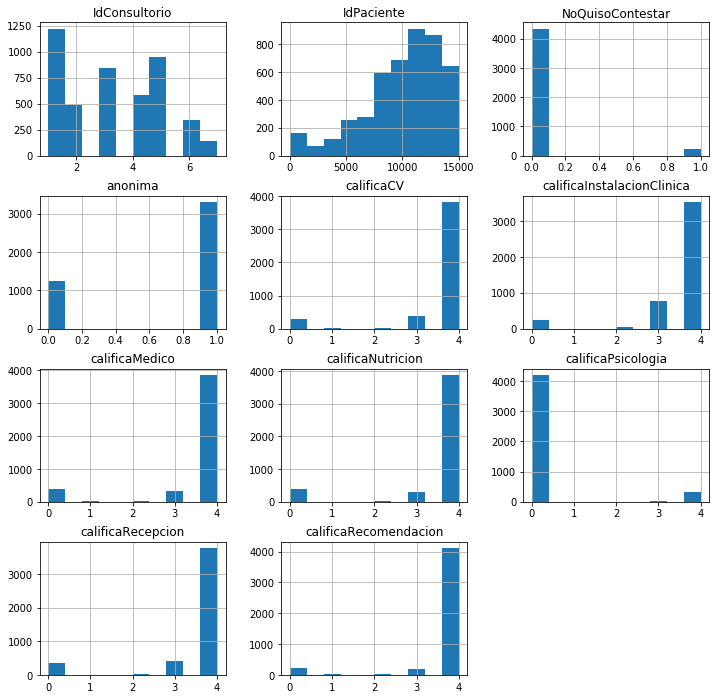

In [21]:
# Plot the histogram to see the distribution of each numerical features
plt.figure()
g= graph_df.hist(figsize=(12,12))
plt.show()

<Figure size 864x864 with 0 Axes>

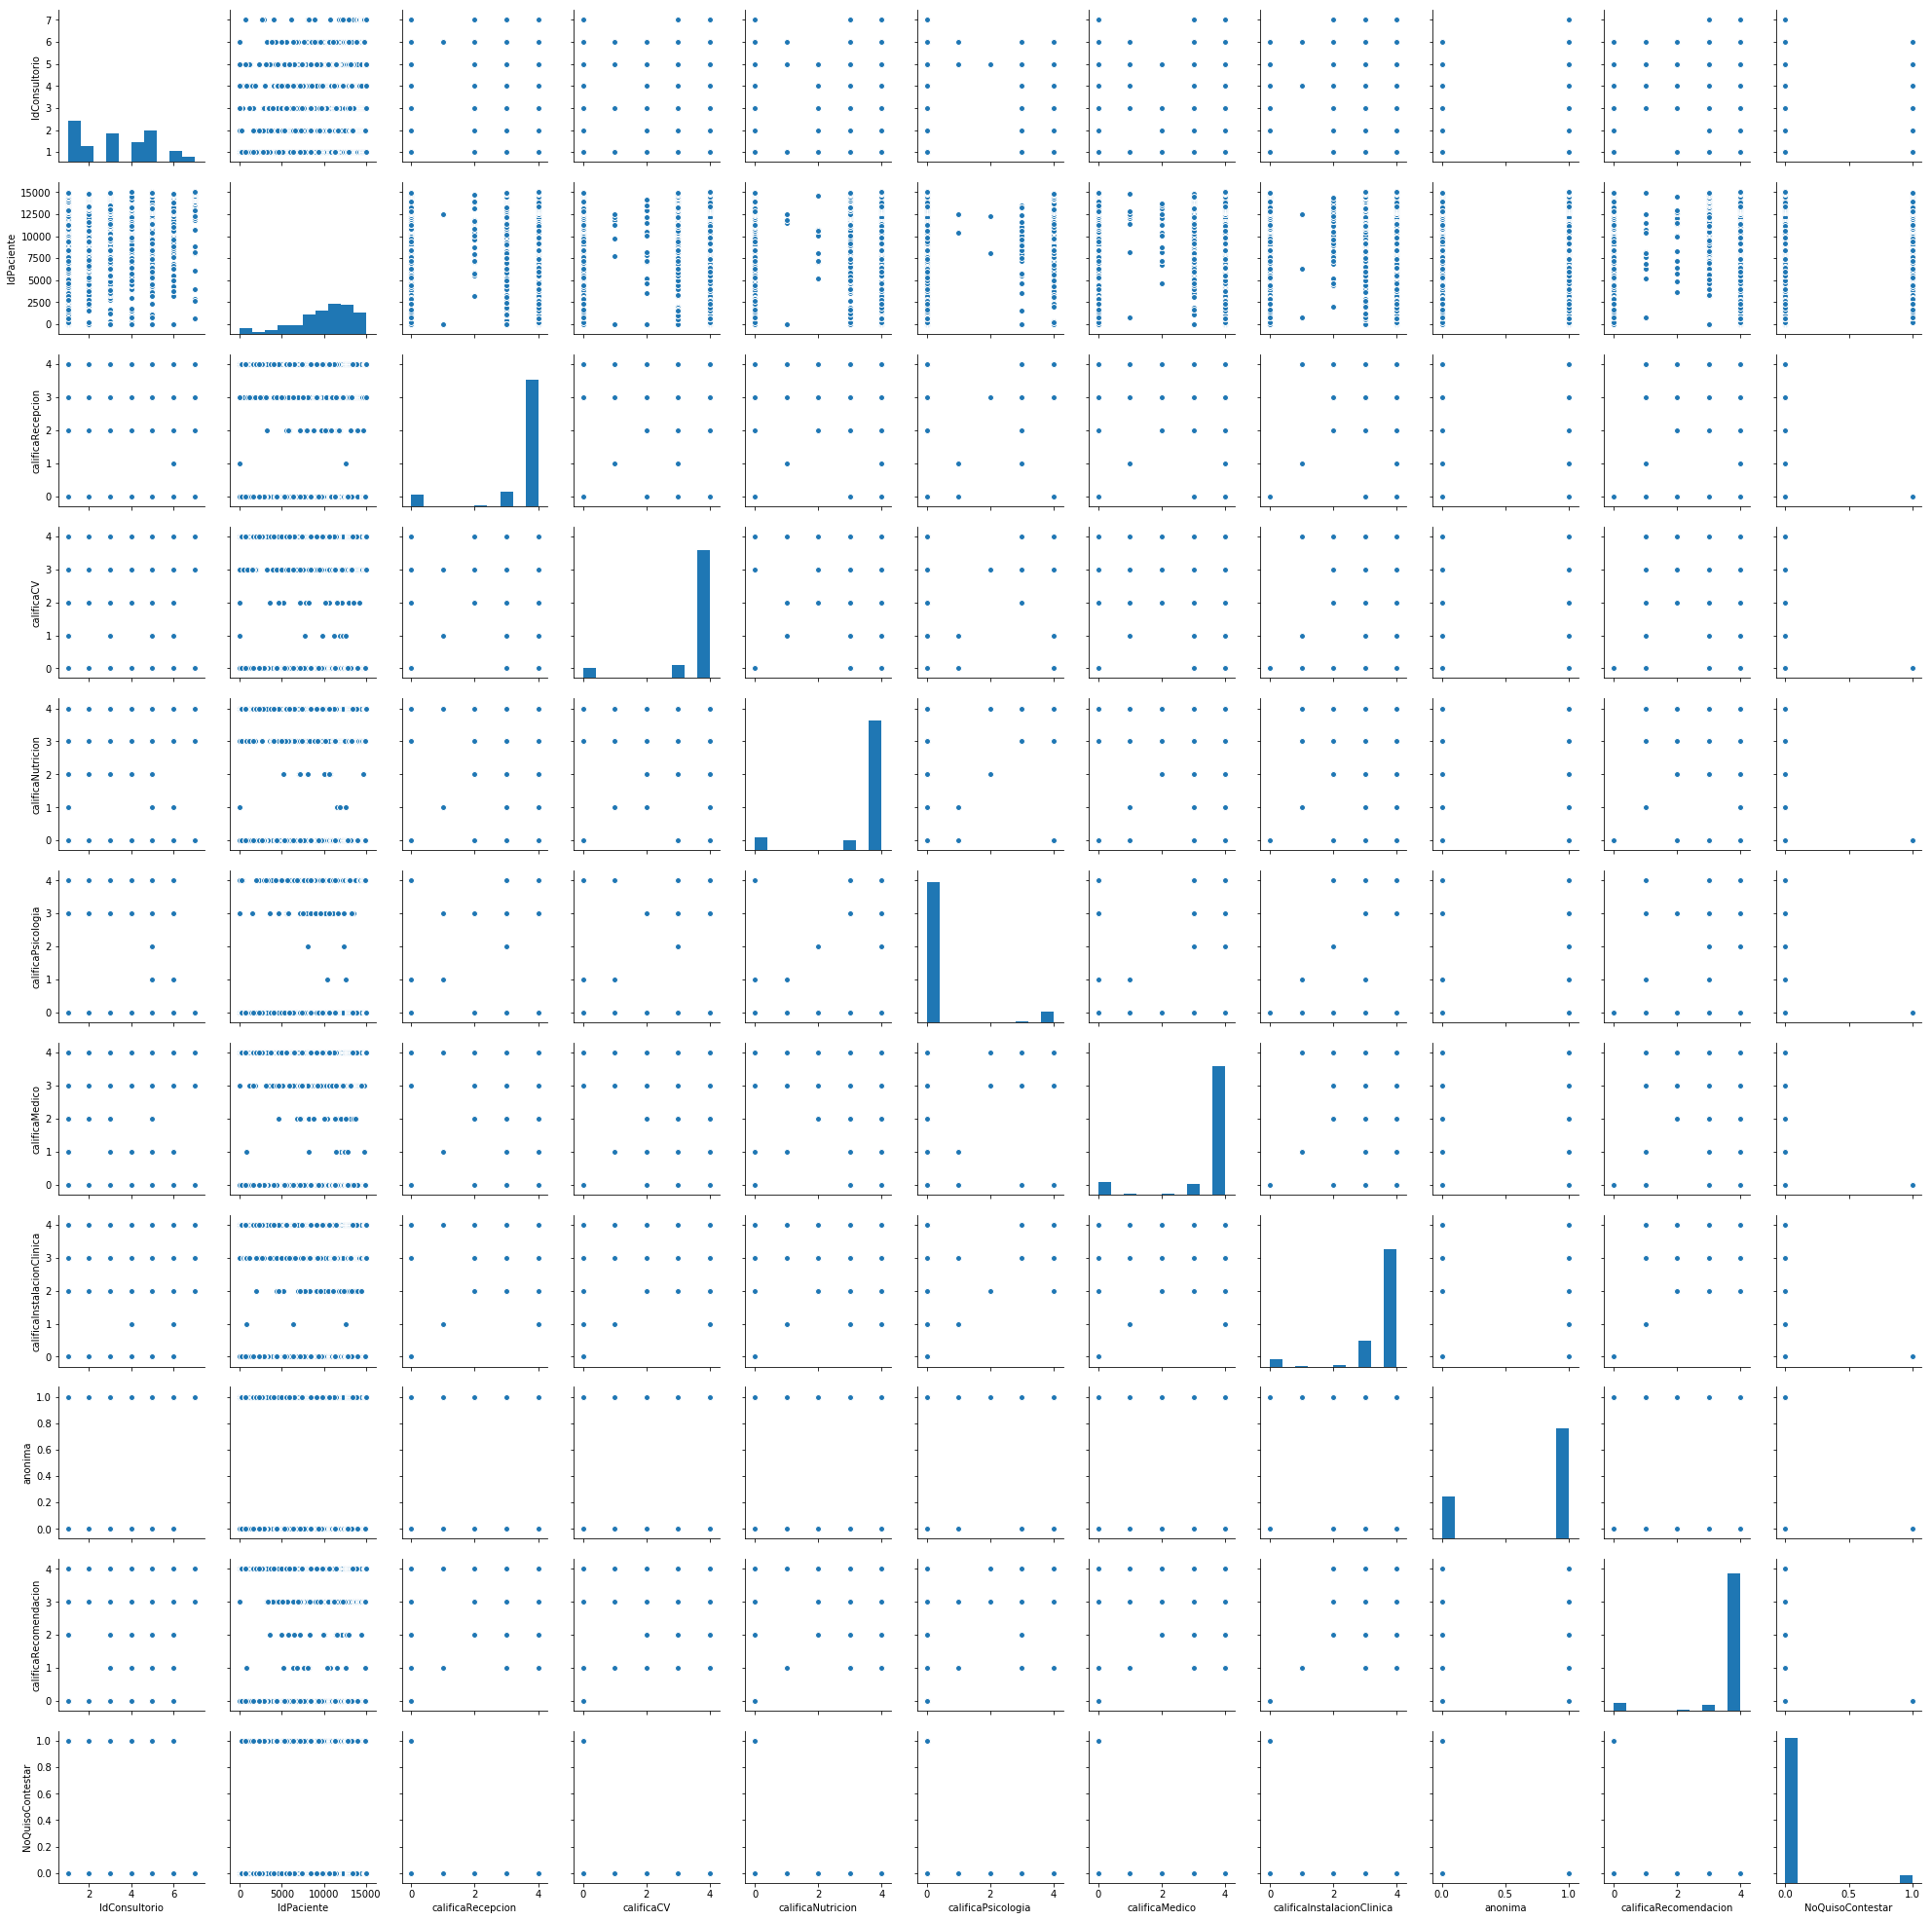

In [22]:
# Plot the pairplot to check the distribuiton of features without Missing values and also check the plot a pairwise relationships of all the features
plt.figure(figsize=(12,12))
sns.pairplot(graph_df)
plt.show()

In [23]:
#Correlation Matrix to determine the correlation of the parameters in the table
task2_III_Datos_df_encuestas_servicios.iloc[:,:-1].corr().style.format("{:.01}").background_gradient(cmap=plt.get_cmap('Reds'), axis=1)

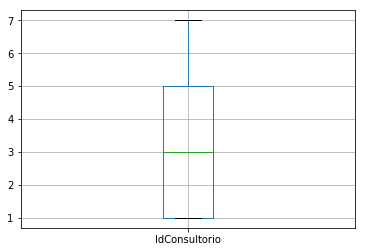

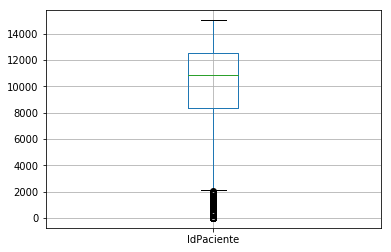

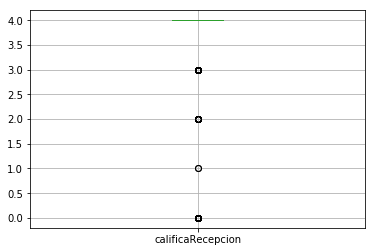

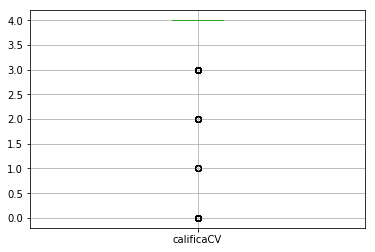

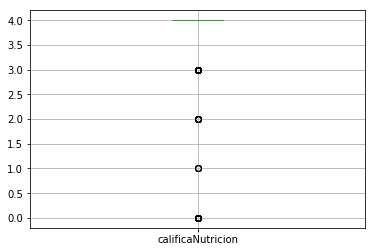

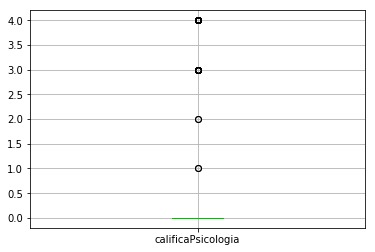

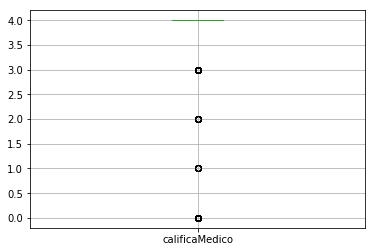

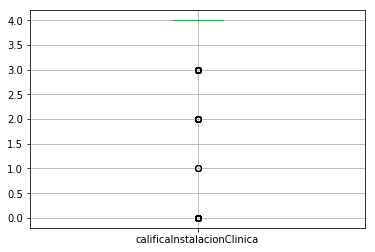

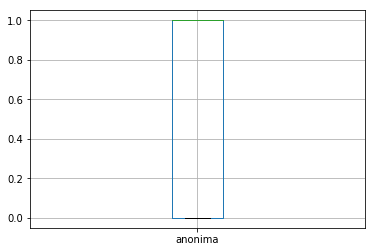

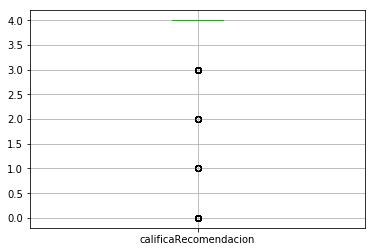

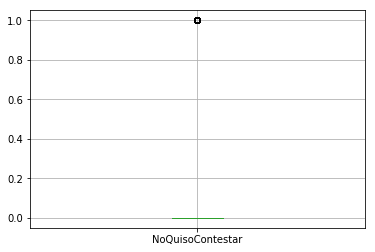

In [24]:
# Displaying boxplots to understand the range of the values and spot the outliers
for column in graph_df:
    plt.figure()
    graph_df.boxplot([column])

## III Datos CMU (ENC) dataset config_calificaciones spreadsheet

In [ ]:
#configuration_qualifications

In [25]:
task2_III_Datos_df_config_calificaciones = pd.read_excel('s3://{}/{}'.format(bucketname, task2_III_Datos_df_key), 'config_calificaciones', encoding = 'ISO-8859-1')
task2_III_Datos_df_config_calificaciones

IdCalificacion descripcion descripcion_alterna
0               1    MUY MALA  NO LA RECOMENDARIA
1               2     REGULAR               NO SE
2               3       BUENA         MAS O MENOS
3               4   EXCELENTE               MUCHO

In [26]:
print("Number of records (patients): ", task2_III_Datos_df_config_calificaciones.shape[0], ", and Number of columns (features): ", task2_III_Datos_df_config_calificaciones.shape[1])

Number of records (patients):  4 , and Number of columns (features):  3


### The features in the config_calificaciones spreadsheet of III Datos CMU (ENC) dataset are not numerical and so there is no scope to perform exploratory and summary analysis on it

## IV Datos CMU (BAL) dataset evoluciones spreadsheet

In [6]:
#evolutions
#Medical evolution notes : Free text,Body temperature,Heart rate,Breathing frequency, Weight,Height

In [7]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [9]:
task2_IV_Datos_df_key ='IV Datos CMU (BAL).xlsx'
task2_IV_Datos_df_evoluciones = pd.read_excel('s3://{}/{}'.format(bucketname, task2_IV_Datos_df_key), 'evoluciones', encoding = 'ISO-8859-1', parse_dates=['Fecha'])
task2_IV_Datos_df_evoluciones.head(10)

IdEvolucion  IdPaciente      Fecha      Hora  \
0            1         786 2013-02-28  07:42:03   
1            2         768 2013-02-28  16:42:12   
2            3         768 2013-02-28  10:58:14   
3            4         775 2013-03-19  10:34:44   
4            5         772 2013-02-28  16:46:44   
5            6         756 2013-02-28  17:22:00   
6            7         756 2013-03-06  11:59:13   
7            8         752 2013-03-01  18:12:07   
8            9          40 2013-03-04  07:51:17   
9           10          40 2013-03-04  07:52:20   

                        ReporteEventosComplicaciones  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6                                                NaN   
7  REPORTA EVENTOS DE HIPOGLICEMIA LEVE A MODERAD...   
8  Acude por malessta r general  debilidad con gl...   
9                                                NaN   

                                       NotaEvolucion  \
0  Se  trata de paciente femenina de  58  años de...   
1  Se trata de paciente masculino de  21  años de...   
2  Se trata de paciente masculino de  21  años de...   
3  se  trata de paciente  femenina de  64  años d...   
4  Se trata de paciente  femenina de  68  años de...   
5  Se trata de paciente masculino de 35 años con ...   
6  Se trata de paciente masculino de 35 años con ...   
7  Se  trata de  paciente  masculino de  57  años...   
8  Acude paciente  a sus  examenes de laboratorio...   
9  Blanca, 58 años, acude a seguimiento de contro...   

                                          Pronostico  \
0  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
1  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
2  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
3                                                NaN   
4  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
5  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
6  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
7  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
8  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
9  BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   

                            usuario  Temperatura   FC  FR    Peso  Talla   CC  \
0  39564f3f8482346e4764d24bb0a60260          0.0   82  18   0.000   1.57  0.0   
1  707ccb674ec55ff9aa6114e0cd221546          0.0  116  16  59.500   1.87  0.0   
2  707ccb674ec55ff9aa6114e0cd221546          0.0  116  16  59.500   0.00  0.0   
3  707ccb674ec55ff9aa6114e0cd221546          0.0    0   0  86.800   1.48  0.0   
4  39564f3f8482346e4764d24bb0a60260          0.0    0   0   0.000   0.00  0.0   
5  39564f3f8482346e4764d24bb0a60260         36.5   99  18   0.659   1.81  0.0   
6  39564f3f8482346e4764d24bb0a60260          0.0   86   0  62.400   1.81  0.0   
7  14050103ca54aecc6e1639a4568cef15          0.0    0   0   0.000   0.00  0.0   
8  39564f3f8482346e4764d24bb0a60260          0.0    0   0   0.000   1.58  0.0   
9  39564f3f8482346e4764d24bb0a60260          0.0    0   0   0.000   1.58  0.0   

   HADiastolica  HASistolica FechaReceta UsuarioReceta  \
0            80          147         NaT           NaN   
1            76          125         NaT           NaN   
2            76          125         NaT           NaN   
3            70          130         NaT           NaN   
4             0            0         NaT           NaN   
5            90          168         NaT           NaN   
6            79          132         NaT           NaN   
7             0            0         NaT           NaN   
8             0            0         NaT           NaN   
9             0            0         NaT           NaN   

   IdConsultorioCreacionEv  HipoglucemiaSintomatica  Hipogl

In [9]:
# Number of records and features in IV Datos CMU (ENC) dataset evoluciones spreadsheet
print("Number of records (patients): ", task2_IV_Datos_df_evoluciones.shape[0], ", and Number of columns (features): ", task2_IV_Datos_df_evoluciones.shape[1])

Number of records (patients):  35142 , and Number of columns (features):  31


In [10]:
#Format of the data in IV Datos CMU (ENC) dataset evoluciones spreadsheet
task2_IV_Datos_df_evoluciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35142 entries, 0 to 35141
Data columns (total 31 columns):
IdEvolucion                     35142 non-null int64
IdPaciente                      35142 non-null int64
Fecha                           35142 non-null datetime64[ns]
Hora                            35142 non-null object
ReporteEventosComplicaciones    4332 non-null object
NotaEvolucion                   34546 non-null object
Pronostico                      28689 non-null object
usuario                         35142 non-null object
Temperatura                     35142 non-null float64
FC                              35142 non-null int64
FR                              35142 non-null int64
Peso                            35142 non-null float64
Talla                           35142 non-null float64
CC                              35142 non-null float64
HADiastolica                    35142 non-null int64
HASistolica                     35142 non-null int64
FechaReceta           

In [11]:
#Number of null values in each of the columns
task2_IV_Datos_df_evoluciones.isnull().sum()

IdEvolucion                         0
IdPaciente                          0
Fecha                               0
Hora                                0
ReporteEventosComplicaciones    30810
NotaEvolucion                     596
Pronostico                       6453
usuario                             0
Temperatura                         0
FC                                  0
FR                                  0
Peso                                0
Talla                               0
CC                                  0
HADiastolica                        0
HASistolica                         0
FechaReceta                      6291
UsuarioReceta                    4722
IdConsultorioCreacionEv         24584
HipoglucemiaSintomatica         35142
HipoglucemiaDocumentada         35142
TipoHipoglucemia                35142
AP                                  0
EC                                  0
IA                                  0
AR                                  0
IC          

In [12]:
#Summary statistics for numeric data
task2_IV_Datos_df_evoluciones.describe().T

count          mean           std  min      25%  \
IdEvolucion              35142.0  17571.500000  10144.765916  1.0  8786.25   
IdPaciente               35142.0   6325.635906   3597.446797  0.0  3607.00   
Temperatura              35142.0     14.248438     17.589585  0.0     0.00   
FC                       35142.0     35.181578     40.359294  0.0     0.00   
FR                       35142.0      8.108275     10.716784  0.0     0.00   
Peso                     35142.0     76.098132     30.165761  0.0    64.60   
Talla                    35142.0      1.601725      1.064085  0.0     1.54   
CC                       35142.0     89.718436     35.102023  0.0    89.00   
HADiastolica             35142.0     73.983069     19.962566  0.0    70.00   
HASistolica              35142.0    117.305788     26.619231  0.0   110.00   
IdConsultorioCreacionEv  10558.0      3.100493      1.946484  1.0     1.00   
HipoglucemiaSintomatica      0.0           NaN           NaN  NaN      NaN   
HipoglucemiaDocumentada      0.0           NaN           NaN  NaN      NaN   
TipoHipoglucemia             0.0           NaN           NaN  NaN      NaN   
AP                       35142.0      0.010273      0.100833  0.0     0.00   
EC                       35142.0      0.000000      0.000000  0.0     0.00   
IA                       35142.0      0.017956      0.132792  0.0     0.00   
AR                       35142.0      0.020944      0.143198  0.0     0.00   
IC                       35142.0      0.007484      0.086187  0.0     0.00   
AC                       35138.0      0.013945      0.117264  0.0     0.00   
DM                       35138.0      0.961978      0.191251  0.0     1.00   
AnioDM                   35095.0   1923.525374    396.864132  0.0  2000.00   

                             50%       75%        max  
IdEvolucion              17571.5  26356.75  35142.000  
IdPaciente                6087.0   8944.00  15027.000  
Temperatura                  0.0     36.00     77.700  
FC                           0.0     76.00    870.000  
FR                           0.0     18.00    363.000  
Peso                        75.1     87.00    999.999  
Talla                        1.6      1.69    163.000  
CC                          98.0    107.00   1000.000  
HADiastolica                80.0     80.00    909.000  
HASistolica                120.0    130.00    240.000  
IdConsultorioCreacionEv      3.0      5.00      7.000  
HipoglucemiaSintomatica      NaN       NaN        NaN  
HipoglucemiaDocumentada      NaN       NaN        NaN  
TipoHipoglucemia             NaN       NaN        NaN  
AP                           0.0      0.00      1.000  
EC                           0.0      0.00      0.000  
IA                           0.0      0.00      1.000  
AR                           0.0      0.00      1.000  
IC                           0.0      0.00      1.000  
AC                           0.0      0.00      1.000  
DM                           1.0      1.00      1.000  
AnioDM                    2007.0   2012.00   2016.000

In [13]:
#Summary statistics for categorical data
task2_IV_Datos_df_evoluciones.describe(exclude = [np.number]).T

count unique  \
Fecha                         35142   1153   
Hora                          35142  20961   
ReporteEventosComplicaciones   4332   3233   
NotaEvolucion                 34546  34384   
Pronostico                    28689      3   
usuario                       35142     59   
FechaReceta                   28851   1043   
UsuarioReceta                 30420     42   
TipoDM                        35095      3   

                                                                            top  \
Fecha                                                       2016-11-25 00:00:00   
Hora                                                                   09:35:58   
ReporteEventosComplicaciones                                            Ninguno   
NotaEvolucion                 Paciente masculino de 77 años de edad, con dia...   
Pronostico                    BUENO PARA LA FUNCIÓN Y PARA LA VIDA, LIGADO A...   
usuario                                        b13402b8c58ee591925c08f6e0bb7668   
FechaReceta                                                 2016-11-25 00:00:00   
UsuarioReceta                                  b13402b8c58ee591925c08f6e0bb7668   
TipoDM                                                                   TIPO 2   

                               freq                first                 last  
Fecha                            96  2013-02-28 00:00:00  2016-12-30 00:00:00  
Hora                             10                  NaN                  NaN  
ReporteEventosComplicaciones    622                  NaN                  NaN  
NotaEvolucion                     3                  NaN                  NaN  
Pronostico                    26871                  NaN                  NaN  
usuario                        6161                  NaN                  NaN  
FechaReceta                      85  2013-08-28 00:00:00  2019-10-18 00:00:00  
UsuarioReceta                  5337                  NaN                  NaN  
TipoDM                        32785                  NaN                  NaN

### Selecting meaningful features to proceed with a histogram & pairplot graphical representation - We have excluded features that have ids and selected the following features as they seem to have values on which we can perform exploratory data analysis and potentially have outlier values in them

In [11]:
print(collections.Counter(task2_IV_Datos_df_evoluciones['AnioDM']))

Counter({2015.0: 2460, 2014.0: 2331, 2012.0: 2143, 2013.0: 2062, 2010.0: 1933, 2000.0: 1909, 2005.0: 1629, 2008.0: 1540, 2011.0: 1515, 2016.0: 1513, 0.0: 1370, 2006.0: 1342, 2009.0: 1305, 2007.0: 1194, 2002.0: 1172, 2004.0: 1102, 2003.0: 813, 1999.0: 781, 2001.0: 766, 1995.0: 751, 1998.0: 695, 1994.0: 601, 1996.0: 566, 1997.0: 534, 1990.0: 513, 1993.0: 292, 1992.0: 286, 1987.0: 236, 1991.0: 236, 1988.0: 229, 1989.0: 194, 1985.0: 162, 1984.0: 155, 1986.0: 124, 1983.0: 107, 1981.0: 55, 1982.0: 46, 1970.0: 46, 1980.0: 43, 1973.0: 40, 1974.0: 31, 1968.0: 29, 1971.0: 23, 1969.0: 22, 1972.0: 21, 1978.0: 20, 1979.0: 20, 1977.0: 18, 1976.0: 14, 26.0: 13, 12.0: 10, 200.0: 9, 1901.0: 8, 1955.0: 7, 28.0: 6, 10.0: 6, 91.0: 6, 97.0: 5, 1975.0: 5, 25.0: 4, 208.0: 4, 1913.0: 4, 214.0: 3, 1904.0: 3, 1960.0: 2, 1964.0: 2, 1197.0: 2, 1900.0: 2, 1905.0: 2, nan: 1, nan: 1, nan: 1, nan: 1, 209.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 1965.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, n

In [14]:
graph_df = task2_IV_Datos_df_evoluciones[['Temperatura','FC','FR','Peso','Talla','CC','HADiastolica','HASistolica','IdConsultorioCreacionEv','AP','IA','AR','IC','AC','DM','AnioDM']]

<Figure size 432x288 with 0 Axes>

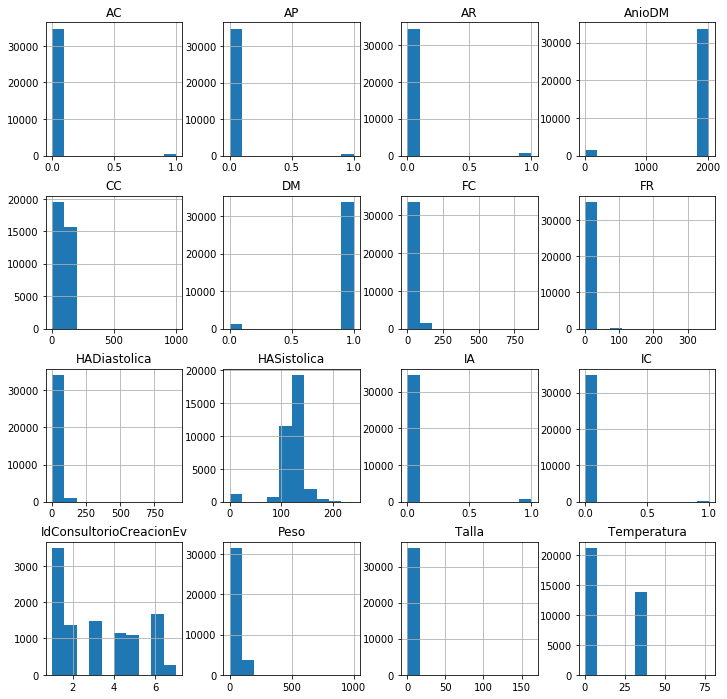

In [15]:
# Plot the histogram to see the distribution of each numerical features
plt.figure()
g= graph_df.hist(figsize=(12,12))
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning:

invalid value encountered in greater_equal

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning:

invalid value encountered in less_equal



<Figure size 864x864 with 0 Axes>

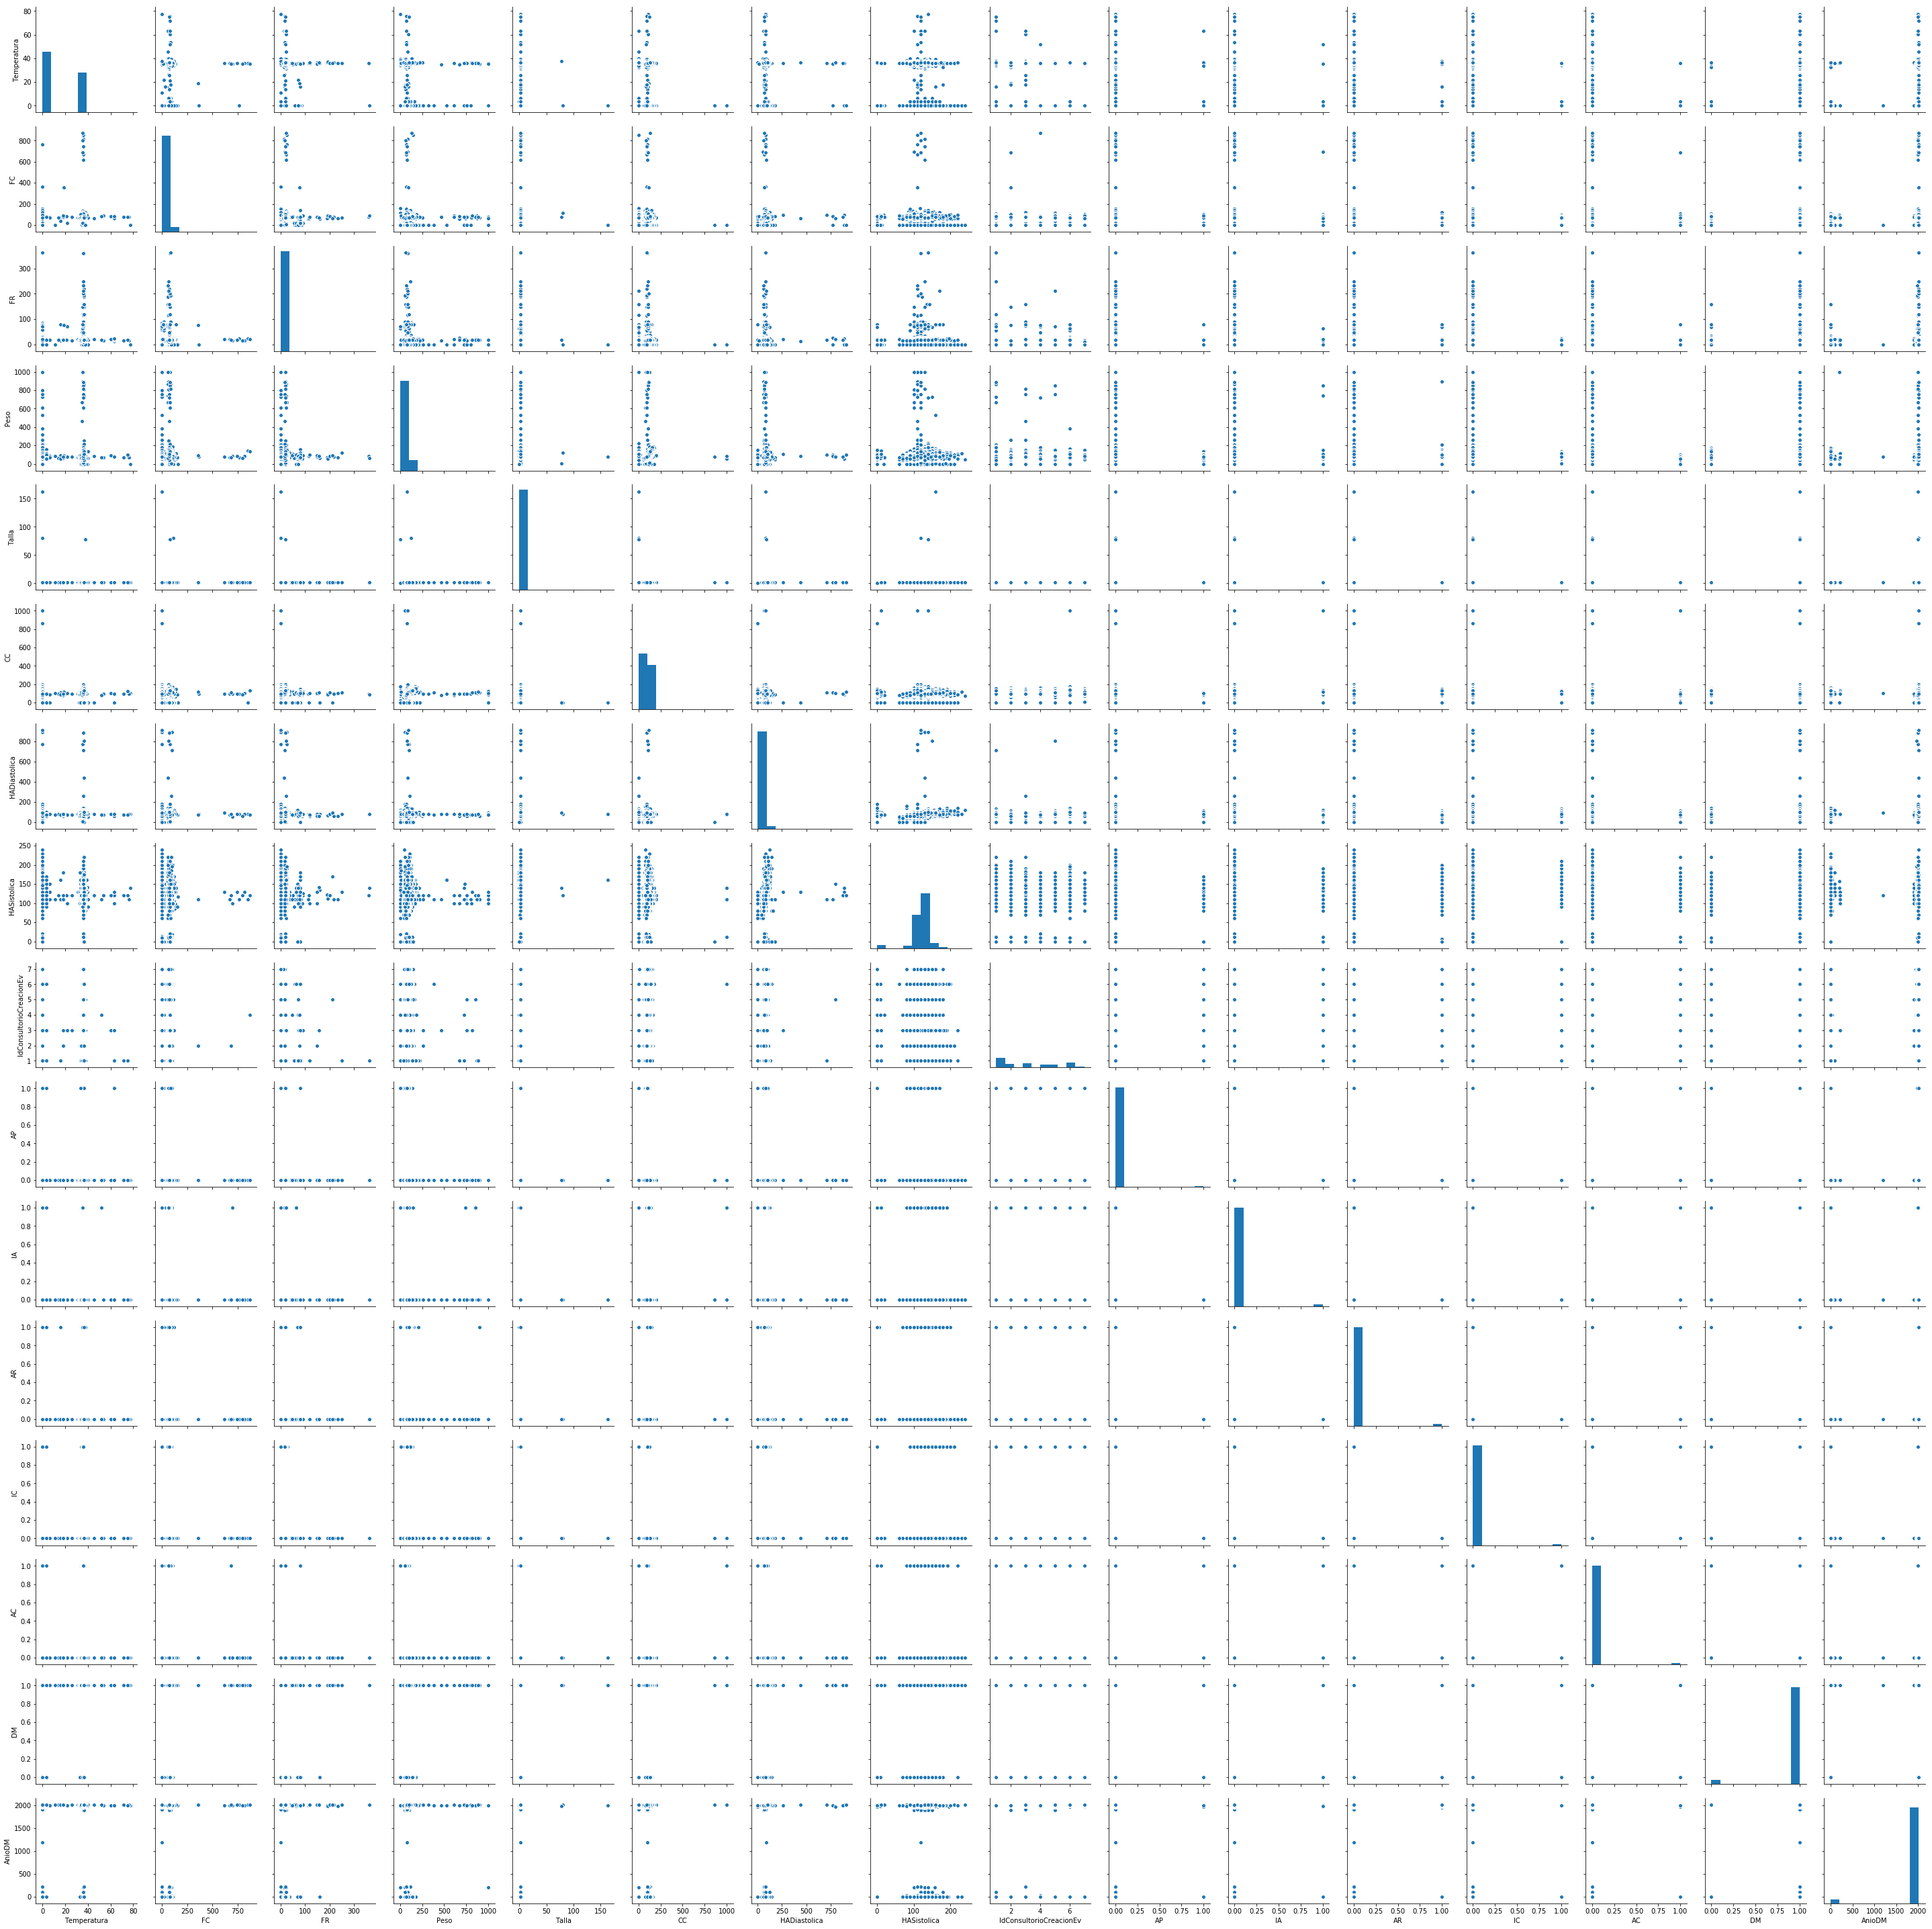

In [16]:
# Plot the pairplot to check the distribuiton of features without Missing values and also check the plot a pairwise relationships of all the features
plt.figure(figsize=(12,12))
sns.pairplot(graph_df)
plt.show()

In [17]:
# Correlation matrix
graph_df.iloc[:,:-1].corr().style.format("{:.01}").background_gradient(cmap=plt.get_cmap('Reds'), axis=1)

In [18]:
# Note : we can find out lots of extreme outliers (values needs treatment )
#FC Heart rate 
# FR Breathing frequency 

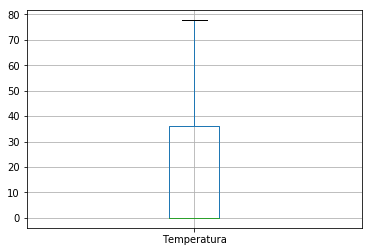

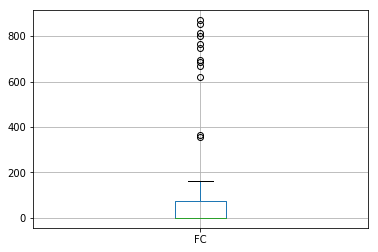

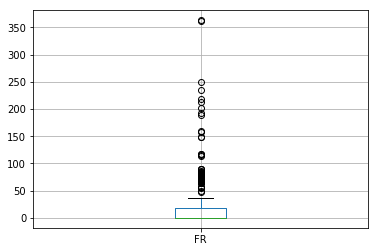

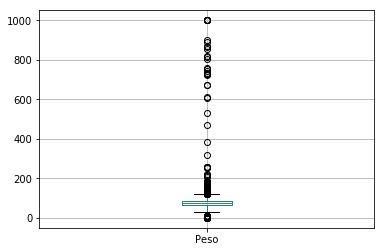

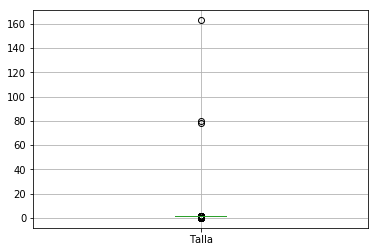

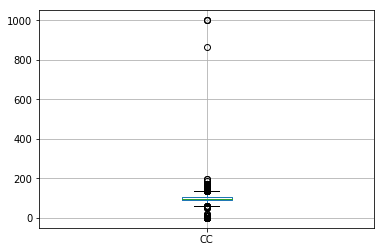

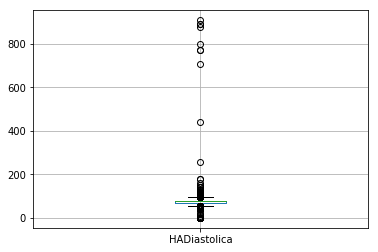

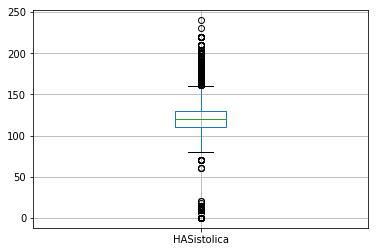

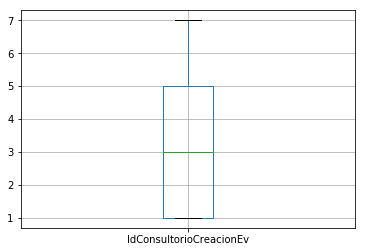

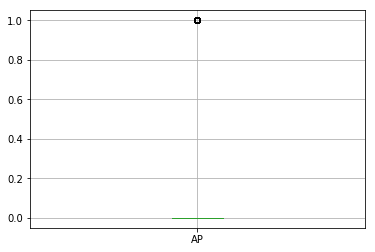

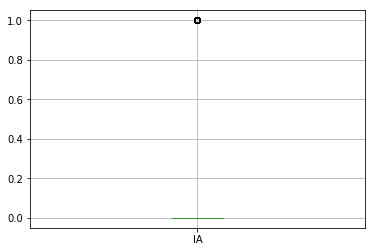

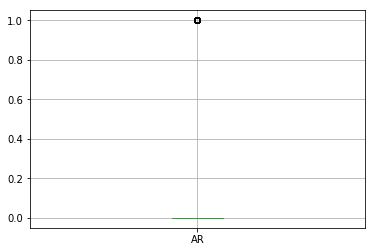

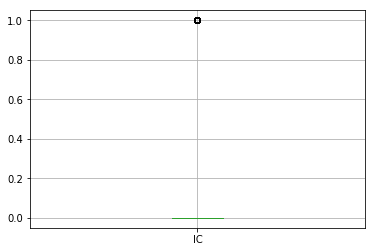

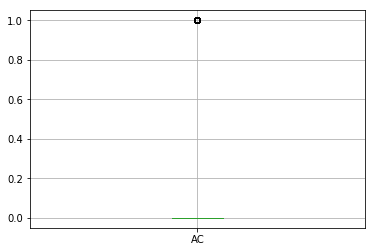

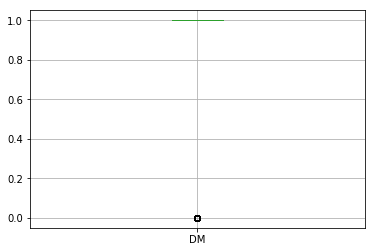

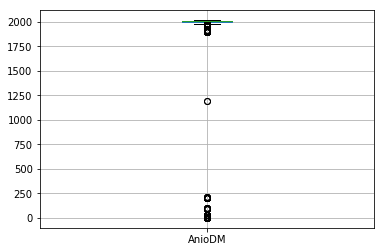

In [19]:
# Displaying boxplots to understand the range of the values and spot the outliers
for column in graph_df:
    plt.figure()
    graph_df.boxplot([column])

In [34]:
Balance_Parte1_df_key ='Balance - Tablas (Parte 1 ).xlsx'
Balance1_df = pd.read_excel('s3://{}/{}'.format(bucketname, Balance_Parte1_df_key), 'pacientes', encoding = 'ISO-8859-1',parse_dates=['Fecha'] )
Balance1_df.head(5)
Balance1_df['Escolaridad'].unique() df = Balance1_df['Escolaridad']
df.dropna(axis=0, how='any', inplace=True)

In [35]:
df= pd.DataFrame(typo_df)
#df =df['Escolaridad'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 0 to 35141
Data columns (total 1 columns):
TipoDM    35095 non-null object
dtypes: object(1)
memory usage: 1.8+ MB


In [20]:
# Displaying a count plot to understand the distribution of TipoDM categorical feature
typo_df = task2_IV_Datos_df_evoluciones['TipoDM']
typo_df.dropna(axis=0, how='any', inplace=True)
typo_df = pd.DataFrame(typo_df)

In [23]:
typo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 0 to 35141
Data columns (total 1 columns):
TipoDM    35095 non-null object
dtypes: object(1)
memory usage: 1.8+ MB


In [ ]:
#Notes : Gestational diabetes is a condition in which a woman without diabetes develops high blood sugar levels
# during pregnancy.

In [21]:
counting_types = collections.Counter(typo_df['TipoDM'])
counting_types

Counter({'TIPO 2': 32785, 'TIPO 1': 2260, 'GESTACIONAL': 50})

[Text(0, 0, 'TIPO 2'), Text(0, 0, 'TIPO 1'), Text(0, 0, 'GESTACIONAL')]

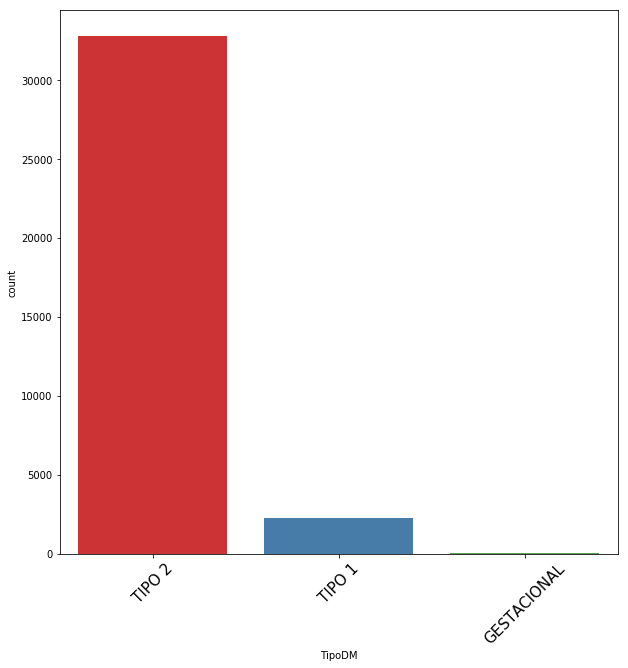

In [22]:
plt.figure(figsize =(10,10))
a = sns.countplot(x='TipoDM', data = typo_df, palette = 'Set1')
a.set_xticklabels(a.get_xticklabels(), rotation=45, fontsize =15)

## IV Datos CMU (BAL) dataset estatusrazonesnocompro_n2 spreadsheet

In [12]:
#status reasons for not buying n2

In [41]:
task2_IV_Datos_df_estatusrazonesnocompro_n2 = pd.read_excel('s3://{}/{}'.format(bucketname, task2_IV_Datos_df_key), 'estatusrazonesnocompro_n2', encoding = 'ISO-8859-1')
task2_IV_Datos_df_estatusrazonesnocompro_n2

IdEstatusRazonNoCompro_N2 IdEstatusRazonNoCompro  \
0                           1                      A   
1                           2                      A   
2                           3                      A   
3                           4                      A   
4                           5                      B   
5                           6                      B   
6                           7                      B   
7                           8                      B   
8                           9                      B   
9                          10                      C   
10                         11                      C   
11                         12                      C   
12                         13                      C   
13                         14                      E   
14                         15                      E   
15                         16                      E   
16                         17                      F   
17                         18                      F   
18                         19                      F   
19                         20                      F   
20                         21                      F   
21                         22                      D   
22                         23                      G   

                       Descripcion  Orden  
0                           PAREJA     10  
1                            HIJOS     20  
2                           PADRES     30  
3                             OTRO     40  
4               SACO CITA Y PAGARA     50  
5     TENDRA PROXIMA QUINCENA, MES     60  
6                   ESTA ENDEUDADO     70  
7                 NO TIENE TRABAJO     80  
8         CAPACIDAD DE PAGO TOPADA     90  
9                             IMSS    100  
10                          ISSSTE    110  
11                  SEGURO POPULAR    120  
12                         PRIVADO    130  
13                      PENSIONADO    140  
14                  BAJOS INGRESOS    150  
15                            OTRO    160  
16    ESPERABA MAS ESPECIALIZACION    170  
17                  LE QUEDA LEJOS    180  
18  NO SE LE ACOMODAN LOS HORARIOS    190  
19           NO LE GUSTO EL MEDICO    200  
20                            OTRO    210  
21        QUIERE PROBAR RESULTADOS    220  
22               NO TIENE DIABETES    230

In [42]:
# Number of records and features in IV Datos CMU (ENC) dataset estatusrazonesnocompro_n2 spreadsheet
print("Number of records (patients): ", task2_IV_Datos_df_estatusrazonesnocompro_n2.shape[0], ", and Number of columns (features): ", task2_IV_Datos_df_estatusrazonesnocompro_n2.shape[1])

Number of records (patients):  23 , and Number of columns (features):  4


In [43]:
#Format of the data in IV Datos CMU (ENC) dataset estatusrazonesnocompro_n2 spreadsheet
task2_IV_Datos_df_estatusrazonesnocompro_n2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
IdEstatusRazonNoCompro_N2    23 non-null int64
IdEstatusRazonNoCompro       23 non-null object
Descripcion                  23 non-null object
Orden                        23 non-null int64
dtypes: int64(2), object(2)
memory usage: 816.0+ bytes


In [44]:
#Number of null values in the features
task2_IV_Datos_df_estatusrazonesnocompro_n2.isnull().sum()

IdEstatusRazonNoCompro_N2    0
IdEstatusRazonNoCompro       0
Descripcion                  0
Orden                        0
dtype: int64

In [45]:
#descriptive analysis
task2_IV_Datos_df_estatusrazonesnocompro_n2.describe().T

count   mean       std   min   25%    50%    75%  \
IdEstatusRazonNoCompro_N2   23.0   12.0   6.78233   1.0   6.5   12.0   17.5   
Orden                       23.0  120.0  67.82330  10.0  65.0  120.0  175.0   

                             max  
IdEstatusRazonNoCompro_N2   23.0  
Orden                      230.0

In [46]:
#analysis on the categorical features
task2_IV_Datos_df_estatusrazonesnocompro_n2.describe(exclude =[np.number]).T

count unique   top freq
IdEstatusRazonNoCompro    23      7     F    5
Descripcion               23     21  OTRO    3

### The features of this spreadsheet do not seem to have values which are outliers or on which we can perform exploratory data analysis 

 ## IV Datos CMU (BAL) dataset estatusrazonesnocompro spreadsheet

### Status reasons for not buying

##### A : ECONOMIC DEPENDENCE
##### B :NO MONEY AT THE MOMENT
##### C : IT IS SERVED IN ANOTHER PLACE AND IT IS CONFORMING
##### D :WANT TO TRY RESULTS
##### E :FOUNDATION CANDIDATE
##### F :NOT INTERESTED
##### G :NO DIABETES

In [47]:
task2_IV_Datos_df_estatusrazonesnocompro = pd.read_excel('s3://{}/{}'.format(bucketname, task2_IV_Datos_df_key), 'estatusrazonesnocompro', encoding = 'ISO-8859-1')
task2_IV_Datos_df_estatusrazonesnocompro

IdEstatusRazonNoCompro                               Descripcion  Orden
0                      A                     DEPENDENCIA ECONÓMICA     10
1                      B               NO HAY DINERO EN EL MOMENTO     20
2                      C  SE ATIENDE EN OTRO LUGAR Y ESTA CONFORME     30
3                      D                  QUIERE PROBAR RESULTADOS     40
4                      E                       CANDIDATO FUNDACION     50
5                      F                            NO LE INTERESA     60
6                      G                         NO TIENE DIABETES     70

In [48]:
# Number of records and features in IV Datos CMU (ENC) dataset estatusrazonesnocompro spreadsheet
print("Number of records (patients): ", task2_IV_Datos_df_estatusrazonesnocompro.shape[0], ", and Number of columns (features): ", task2_IV_Datos_df_estatusrazonesnocompro.shape[1])

Number of records (patients):  7 , and Number of columns (features):  3


In [49]:
#Format of the data in IV Datos CMU (ENC) dataset estatusrazonesnocompro spreadsheet
task2_IV_Datos_df_estatusrazonesnocompro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
IdEstatusRazonNoCompro    7 non-null object
Descripcion               7 non-null object
Orden                     7 non-null int64
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


In [50]:
#Number of null values in the features
task2_IV_Datos_df_estatusrazonesnocompro.isnull().sum()

IdEstatusRazonNoCompro    0
Descripcion               0
Orden                     0
dtype: int64

In [51]:
#descriptive analysis
task2_IV_Datos_df_estatusrazonesnocompro.describe().T

count  mean        std   min   25%   50%   75%   max
Orden    7.0  40.0  21.602469  10.0  25.0  40.0  55.0  70.0

In [52]:
#analysis on the categorical features
task2_IV_Datos_df_estatusrazonesnocompro.describe(exclude =[np.number]).T

count unique                top freq
IdEstatusRazonNoCompro     7      7                  G    1
Descripcion                7      7  NO TIENE DIABETES    1

### The features of this spreadsheet do not seem to have values which are outliers or on which we can perform exploratory data analysis 

## Task 3:
#### Each group should derive a subset of the care events (engagement outcomes) from the data files as follows
#### • Buys or Renews Membership, from the input files IV Datos CMU (BAL)
#### • Cancels Membership, from the input files IV Datos CMU (BAL)

In [14]:
# AbonoMembresiaInscripcion :Membership Registration, 
# CompraFarmacia : Purchase Pharmacy, 
# CompraTienda : shop

In [14]:
task3_IV_Datos_df_key ='IV Datos CMU (BAL).xlsx'
task3_IV_Datos_df = pd.read_excel('s3://{}/{}'.format(bucketname, task3_IV_Datos_df_key),  encoding = 'ISO-8859-1',parse_dates=['Fecha'] )
task3_IV_Datos_df.head(5)

IdPaciente      Fecha  AbonoMembresiaInscripcion  CompraFarmacia  \
0        3299 2014-07-17                          1               0   
1        3301 2014-07-17                          1               0   
2        3311 2014-07-18                          1               0   
3        3311 2014-07-19                          1               0   
4        3321 2014-07-19                          1               0   

   CompraTienda  
0             0  
1             0  
2             0  
3             0  
4             0

In [15]:
#Descriptive statistics of the dataset
task3_IV_Datos_df.describe(exclude = np.number)

Fecha
count                 77155
unique                  758
top     2015-08-18 00:00:00
freq                    427
first   2014-07-17 00:00:00
last    2016-12-31 00:00:00

In [16]:
task3_IV_Datos_df.describe()

IdPaciente  AbonoMembresiaInscripcion  CompraFarmacia  CompraTienda
count  77155.000000               77155.000000    77155.000000  77155.000000
mean    8276.052401                   0.518411        0.316285      0.325306
std     3272.562147                   0.499664        0.465029      0.468492
min        1.000000                   0.000000        0.000000      0.000000
25%     5722.000000                   0.000000        0.000000      0.000000
50%     8106.000000                   1.000000        0.000000      0.000000
75%    10831.000000                   1.000000        1.000000      1.000000
max    15068.000000                   1.000000        1.000000      1.000000

In [17]:
## Print out one of Example Case of Patience number '5299'
task3_IV_Datos_df[task3_IV_Datos_df['IdPaciente'] == 5299]

IdPaciente      Fecha  AbonoMembresiaInscripcion  CompraFarmacia  \
4588         5299 2015-03-02                          1               0   
4589         5299 2015-03-02                          1               0   
4592         5299 2015-03-02                          0               1   
8660         5299 2015-05-14                          1               0   
8661         5299 2015-05-14                          0               1   
8705         5299 2015-05-14                          1               0   
10535        5299 2015-06-10                          0               1   

       CompraTienda  
4588              0  
4589              0  
4592              1  
8660              0  
8661              1  
8705              0  
10535             1

In [18]:
#Build a Analysis step for Customer Retention & Attrition 
task3_IV_Datos_df['year'] = pd.DatetimeIndex(task3_IV_Datos_df['Fecha']).year
task3_IV_Datos_df['Group'] = task3_IV_Datos_df.groupby('IdPaciente')['year'].transform('min')
year = collections.Counter(task3_IV_Datos_df['Group'] )
year

Counter({2014: 6314, 2015: 35133, 2016: 35708})

In [24]:
task3_IV_Datos_df.head(5)

IdPaciente      Fecha  AbonoMembresiaInscripcion  CompraFarmacia  \
0        3299 2014-07-17                          1               0   
1        3301 2014-07-17                          1               0   
2        3311 2014-07-18                          1               0   
3        3311 2014-07-19                          1               0   
4        3321 2014-07-19                          1               0   

   CompraTienda  year  Group  
0             0  2014   2014  
1             0  2014   2014  
2             0  2014   2014  
3             0  2014   2014  
4             0  2014   2014

In [51]:
## Print out one of Example Case of Patience number '3331' after segmentation
task3_IV_Datos_df[task3_IV_Datos_df['IdPaciente'] == 3331]

IdPaciente      Fecha  AbonoMembresiaInscripcion  CompraFarmacia  \
5            3331 2014-07-21                          1               0   
61           3331 2014-08-20                          1               0   
225          3331 2014-09-22                          1               0   
3661         3331 2015-02-13                          0               0   
14121        3331 2015-07-29                          1               0   
15374        3331 2015-08-15                          0               0   
17387        3331 2015-09-09                          1               0   
53999        3331 2016-08-04                          1               0   
76194        3331 2016-12-23                          1               0   

       CompraTienda  year  Group  
5                 0  2014   2014  
61                0  2014   2014  
225               0  2014   2014  
3661              1  2015   2014  
14121             0  2015   2014  
15374             1  2015   2014  
17387             0  2015   2014  
53999             0  2016   2014  
76194             0  2016   2014

In [19]:
# Divide the customers into different year origin group and mak the list into data frame

group12 = []
group24 = []
group36 = []

for x in range(2014,2017) :
    df_12 = task3_IV_Datos_df[(task3_IV_Datos_df['Group'] == x ) &(task3_IV_Datos_df['year'] == x)]
    group12.append(len(df_12['IdPaciente'].unique()))
for x in range(2014,2016) :
    df_24 = task3_IV_Datos_df[(task3_IV_Datos_df['Group'] == x ) &(task3_IV_Datos_df['year'] == x+1)]
    group24.append(len(df_24['IdPaciente'].unique()))  
for x in range(2014,2015) :
    df_36 = task3_IV_Datos_df[(task3_IV_Datos_df['Group'] == x ) & (task3_IV_Datos_df['year'] == x+2)]
    group36.append(len(df_36['IdPaciente'].unique()))

In [20]:
# build a table using above group lists to convert them into pandas dataframe 
a = pd.DataFrame(group12)
b = pd.DataFrame(group24)
c = pd.DataFrame(group36)

new_df = pd.concat([a,b,c],axis=1)
new_df['Time_Range']= pd.DataFrame([ '2014-01-01  to 2014-12-31',
                                '2015-01-01 to 2015-12-31', 
                               '2016-01-01 to 2016-12-31' ]) 
new_df.set_index('Time_Range', inplace=True)
new_df.columns = ['12', '24', '36']
new_df.replace(np.nan,'' , inplace=True)

# Write-up Answer for Task3 :
## As we can see the table below, we can divide the customer group by the 'year' they enter this clinic.
## There are 3 year groups (2014, 2015 and 2016 ) in the data.

## First answer for the  renew membership is  : 
### 2014 year group  :  1) 883 new customers entered this clinic at 2014 -> 2) 532 customers renewed at 2015 -> 3) 2014 customers renewed at 2016
### 2015 year group  :  1) 4234 new customers entered this clinic at 2015 -> 2)1925 customers renewed at 2016
### 2016 year group : 1)6348 new customers entered this clinic at 2016


## Second answer for the cancel membership is  : 
### 2014 year group  :  1) 883 - 532 = 351 customers cancelled at 2015 -> 2) 532 -214 = 318 customers cancelled at 2016
### 2015 year group  :  1) 4234-1925 = 2309 customers cancelled at 2016
### 2016 year group :  Not Applicable. As since our customer group's are aggregated by 'year' and we don't have data for year 2017


In [22]:
new_df

12    24   36
Time_Range                                
2014-01-01  to 2014-12-31   883   532  214
2015-01-01 to 2015-12-31   4234  1925     
2016-01-01 to 2016-12-31   6348

## In this Task, Our group build a bar plot to express 'customer retention &  attrition' which indicates each customer group customer life-time value
## And also build a bar plot of 'Survival Rate' for each customer group to compare their hazard rate and survival rate by groups.

Text(0.5, 1.0, 'Customer Retention & Attrition')

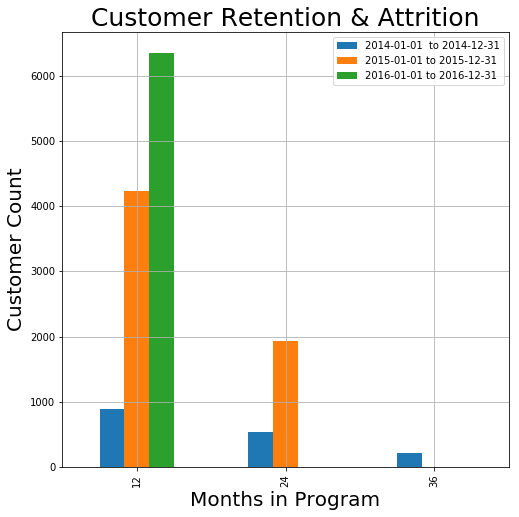

In [23]:
anew=new_df.reset_index()
anew.index = ['2014-01-01  to 2014-12-31',
                                '2015-01-01 to 2015-12-31', 
                               '2016-01-01 to 2016-12-31']
anew= anew[['12','24','36']].apply(pd.to_numeric, errors ='ignore')
fig, ax = plt.subplots(figsize=(8,8))
anew.transpose().plot.bar(ax=ax, linewidth=5)
plt.grid(True)
plt.xlabel('Months in Program', fontsize=20)
plt.ylabel('Customer Count', fontsize =20)
plt.title('Customer Retention & Attrition', fontsize=25)

Text(0.5, 1.0, 'Customer Survival Rate')

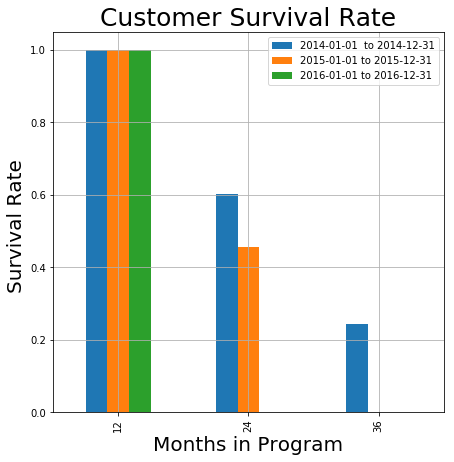

In [24]:
anew=new_df.reset_index()
anew.replace('' ,0, inplace=True)
anew= anew[['12','24','36']].div(anew['12'], axis=0)
anew.replace(0, '' , inplace=True)
anew.index = ['2014-01-01  to 2014-12-31',
                                '2015-01-01 to 2015-12-31', 
                               '2016-01-01 to 2016-12-31']
anew= anew[['12','24','36']].apply(pd.to_numeric, errors ='ignore')
fig, ax = plt.subplots(figsize=(7,7))
anew.transpose().plot.bar(ax=ax, linewidth=5)
plt.grid(True)
plt.xlabel('Months in Program', fontsize=20)
plt.ylabel('Survival Rate ', fontsize =20)
plt.title('Customer Survival Rate', fontsize=25)

## Task 4.
#### Each group will derive a subset of the engagement predictor variables in the following categories
#### • Lifestyle and nutrition, from the input file II Datos CMU (BAL)
#### • Eye care exam results, from the input file II Datos CMU (BAL). For example the diagnosis of diabetic retinopathy is available on the retinographias tab

In [52]:
#Exploring Sheet 1--nutriciondietaspacientes
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_ndiets_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key), encoding = 'ISO-8859-1',parse_dates=['Fecha'] )

In [53]:
task4_II_Datos_ndiets_df.head(5)

IdDietaPaciente  IdPaciente      Fecha      Hora  \
0                1         770 2013-03-06  13:34:54   
1                2         770 2013-03-06  13:35:04   
2                3         770 2013-03-06  13:35:11   
3                4         770 2013-03-06  13:41:01   
4                5         770 2013-03-06  16:21:04   

                            Usuario  Tipo  Calorias  \
0  707ccb674ec55ff9aa6114e0cd221546     1      1500   
1  707ccb674ec55ff9aa6114e0cd221546     1      1500   
2  707ccb674ec55ff9aa6114e0cd221546     1      1500   
3  707ccb674ec55ff9aa6114e0cd221546     1      1700   
4  707ccb674ec55ff9aa6114e0cd221546     1      1200   

                                                  D1  \
0  Queso cottage con fruta 3C de queso cottage1 t...   
1  Queso cottage con fruta 3C de queso cottage1 t...   
2  Queso cottage con fruta 3C de queso cottage1 t...   
3  Leche y galletas1 tza de leche light 3 galleta...   
4  Licuado de frutas1 tza de leche light1 tza de ...   

                                                  D2  \
0  Yogurt con fruta1 tza de yogurt light 1 tza de...   
1  Yogurt con fruta1 tza de yogurt light 1 tza de...   
2  Yogurt con fruta1 tza de yogurt light 1 tza de...   
3  Yogurt con fruta1 tza de yogurt light 1 tza de...   
4  Avena1 tza de leche light2C de avena 1 manzana...   

                                                  D3  \
0  Cereal1 tza de leche light1 tza de cereal inte...   
1  Cereal1 tza de leche light1 tza de cereal inte...   
2  Cereal1 tza de leche light1 tza de cereal inte...   
3  Licuado de fruta1 tza de leche light 1 tza de ...   
4  Cereal1 tza de leche light1/2 tza de cereal in...   

                                                  D4  \
0  Avena1 tza de leche light 2C de avena 1 tza de...   
1  Avena1 tza de leche light 2C de avena 1 tza de...   
2  Avena1 tza de leche light 2C de avena 1 tza de...   
3  Cereal1 tza de leche light1 tza de cereal inte...   
4  Yogurt con fruta1 tza de yogurt natural light1...   

                                                  D5  \
0  Licuado de fruta1 tza de leche light 1 manzana...   
1  Licuado de fruta1 tza de leche light 1 manzana...   
2  Licuado de fruta1 tza de leche light 1 manzana...   
3  Avena1 tza de leche light 2C de avena 1 manzan...   
4  Leche y galletas1 tza de leche light 5 galleta...   

                                                 CO1  \
0  120g de pollo en crema de champiñones1 tza de ...   
1  120g de pollo en crema de champiñones1 tza de ...   
2  120g de pollo en crema de champiñones1 tza de ...   
3  200g de pescado empapelado con verduras1 tza d...   
4  90g de pollo con calabacitas1/2 tza de arroz 2...   

                                                 CO2  \
0  160g de pescado empapelado a las finas hierbas...   
1  160g de pescado empapelado a las finas hierbas...   
2  160g de pescado empapelado a las finas hierbas...   
3  150g de pollo a la plancha 1 tza de arroz 3 to...   
4  90g de fajitas de pollo con chile morron y ceb...   

                                                 CO3  \
0  120g de pollo al achiote 1 tza de arroz 2 tort...   
1  120g de pollo al achiote 1 tza de arroz 2 tort...   
2  120g de pollo al achiote 1 tza de arroz 2 tort...   
3  150g de calabacitas con queso panela 1 tza de ...   
4  120g de pescado empapelado con verduras1/2 tza...   

                                                 CO4  \
0  120g de picadillo con verduras1/2 tza de frijo...   
1  120g de picadillo con verduras1/2 tza de frijo...   
2  120g de picadillo con verduras1/2 tza de frijo...   
3  150g de carne asada1/2 tza de frijoles3 tostad...   
4  90g de milanesa de pollo a la plancha1/2 tza d...   

                                                 CO5  \
0  120g de pollo asado 1 tza de arroz 2 tortillas...   
1  120g de pollo asado 1 tza de arroz 2 tortillas...   
2  120g de pollo asado 1 tza de arroz 2 tortillas...   
3  150g de rollitos de milanesa de pollo rellenos...   
4  90g de pollo a la mexican

In [1]:
#print(collections.Counter(task4_II_Datos_ndiets_df['D1']))

### Creation of dataframe *ndiet*: nutritional diet of the patients. 
The data set includes information on the makeup of the patient diets recommended by the nutritionist. Heavy in textual data, but these may as well be categories. The diets are prescriptions and repeat.

In [72]:
#subsetting nutriciondietaspacientes
ndiet_df = task4_II_Datos_ndiets_df[['IdPaciente','Fecha', 'Tipo', 'Calorias', 'D1', 'D2', 'D3', 'D4', 'D5', 'CO1','CO2', 'CO3', 'CO4', 'CO5', 'CE1', 'CE2', 'CE3', 'CE4', 'CE5', 'MediaManana', 'MediaTarde']]
ndiet_df.head(10)

IdPaciente      Fecha  Tipo  Calorias  \
0         770 2013-03-06     1      1500   
1         770 2013-03-06     1      1500   
2         770 2013-03-06     1      1500   
3         770 2013-03-06     1      1700   
4         770 2013-03-06     1      1200   
5         430 2013-03-26     3      1500   
6         706 2013-04-05     1      1400   
7         919 2013-04-05     3      1400   
8         919 2013-04-05     1      1400   
9         252 2013-04-05     2      1300   

                                                  D1  \
0  Queso cottage con fruta 3C de queso cottage1 t...   
1  Queso cottage con fruta 3C de queso cottage1 t...   
2  Queso cottage con fruta 3C de queso cottage1 t...   
3  Leche y galletas1 tza de leche light 3 galleta...   
4  Licuado de frutas1 tza de leche light1 tza de ...   
5  Sándwich 2 reb de pan integral1 reb de pechuga...   
6  Avena1 tza de leche light2C de avena 1 manzana...   
7  Leche y pan 1 tza de leche light 1/2 bolillo i...   
8  Avena1 tza de leche light2C de avena 1 manzana...   
9  Quesadillas2 tortillas de maíz30g de queso pan...   

                                                  D2  \
0  Yogurt con fruta1 tza de yogurt light 1 tza de...   
1  Yogurt con fruta1 tza de yogurt light 1 tza de...   
2  Yogurt con fruta1 tza de yogurt light 1 tza de...   
3  Yogurt con fruta1 tza de yogurt light 1 tza de...   
4  Avena1 tza de leche light2C de avena 1 manzana...   
5  Yogurt con fruta1 tza de yogurt light 1 tza de...   
6  Gelatina y fruta1 tza de gelatina light 1 tza ...   
7  Claras con jamón 2 claras 1 reb de pechuga de ...   
8  Gelatina y fruta1 tza de gelatina light 1 tza ...   
9  Sándwich 1 reb de pan integral 1 reb de pechug...   

                                                  D3  \
0  Cereal1 tza de leche light1 tza de cereal inte...   
1  Cereal1 tza de leche light1 tza de cereal inte...   
2  Cereal1 tza de leche light1 tza de cereal inte...   
3  Licuado de fruta1 tza de leche light 1 tza de ...   
4  Cereal1 tza de leche light1/2 tza de cereal in...   
5  Claras en salsa 2 claras con salsa de tomate1/...   
6  Yogurt con fruta1 tza de yogurt natural light1...   
7  Licuado de frutas1 tza de leche light 1 tza de...   
8  Yogurt con fruta1 tza de yogurt natural light1...   
9  Tacos de claras2 tortillas de maíz 2 claras gu...   

                                                  D4  \
0  Avena1 tza de leche light 2C de avena 1 tza de...   
1  Avena1 tza de leche light 2C de avena 1 tza de...   
2  Avena1 tza de leche light 2C de avena 1 tza de...   
3  Cereal1 tza de leche light1 tza de cereal inte...   
4  Yogurt con fruta1 tza de yogurt natural light1...   
5  Cereal1 tza de leche light 1 tza de cereal int...   
6  Té y pan 1 tza de té 2 reb de pan integral1c d...   
7  Nopales con queso 1 tza de nopales 30g de ques...   
8  Té y pan 1 tza de té 2 reb de pan integral1c d...   
9  Frijoles con queso1/2 tza de frijoles 30g de q...   

                                                  D5  \
0  Licuado de fruta1 tza de leche light 1 manzana...   
1  Licuado de fruta1 tza de leche light 1 manzana...   
2  Licuado de fruta1 tza de leche light 1 manzana...   
3  Avena1 tza de leche light 2C de avena 1 manzan...   
4  Leche y galletas1 tza de leche light 5 galleta...   
5  Tacos de guiso2 tortillas de maíz 30g de guiso...   
6  Cereal1 tza de leche light1 tza de cereal inte...   
7  Cereal 1 tza de leche light1 tza de cereal int...   
8  Cereal1 tza de leche light1 tza de cereal inte...   
9  Salchicha a la plancha1 salchicha de pavo a la...   

                                                 CO1  \
0  120g de pollo en crema de champiñones1 tza de ...   
1  120g de pollo en crema de champiñones1 tza de ...   
2  120g de pollo en crema de champiñones1 tza de ...   
3  200g de pescado empapelado con verduras1 tza d...   
4  90g de pollo con calabacitas1/2 tza de arroz 2...   
5  120g de pollo con verduras al vapor1/2 tza de ...   
6  120g de pollo en salsa de cilantro1/2 

In [73]:
#Exploring Sheet 2: nutricionevaluacionnutricional
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_neval_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'nutricionevaluacionnutricional', encoding = 'ISO-8859-1',parse_dates=['Fecha'])
task4_II_Datos_neval_df.head(5)

IdEvaluacionNutricional  IdPaciente      Fecha      Hora  \
0                        1         528 2013-10-05  15:56:00   
1                        2          97 2012-03-07  00:00:00   
2                        5         244 2012-05-10  10:15:00   
3                        6         244 2012-07-12  10:00:00   
4                        7         244 2012-08-09  09:25:00   

                            Usuario  Peso  Talla     CC     CA  Muneca  \
0  e5fd4e2c7e689b482829a0ef1a359389   0.0   0.00    0.0    0.0    16.0   
1  e5fd4e2c7e689b482829a0ef1a359389  78.0   1.62  104.0  105.0    16.5   
2  e5fd4e2c7e689b482829a0ef1a359389   0.0   0.00   99.5  103.0    18.9   
3  e5fd4e2c7e689b482829a0ef1a359389   0.0   0.00   95.5   93.0    18.9   
4  e5fd4e2c7e689b482829a0ef1a359389   0.0   0.00   94.0   95.5    18.9   

   PorGrasa  SillaRuedasNoErguido  Pantorrilla  AlturaRodilla  Brazo  \
0       0.0                     1         32.6           51.0   25.5   
1      37.0                     0          0.0            0.0    0.0   
2       0.0                     0          0.0            0.0    0.0   
3       0.0                     0          0.0            0.0    0.0   
4       0.0                     0          0.0            0.0    0.0   

   PliegueCutaneo  MediaBrazada   IMC  
0             0.1          82.0   0.0  
1             0.0           0.0  29.7  
2             0.0           0.0   0.0  
3             0.0           0.0   0.0  
4             0.0           0.0   0.0

### Creation of dataset *neval*: nutritional evaluation of the patients
The data set includes information on the initial evaluation of the patients by nutrition. Incl. BMI (IMC) and whether patients use wheelchairs.

In [74]:
#subsetting nutricionevaluacionnutricional
neval_df = task4_II_Datos_neval_df[['IdPaciente','Fecha', 'Peso', 'Talla', 'PorGrasa', 'SillaRuedasNoErguido', 'IMC']]
neval_df.head(10)

IdPaciente      Fecha    Peso  Talla  PorGrasa  SillaRuedasNoErguido  \
0         528 2013-10-05   0.000  0.000       0.0                     1   
1          97 2012-03-07  78.000  1.620      37.0                     0   
2         244 2012-05-10   0.000  0.000       0.0                     0   
3         244 2012-07-12   0.000  0.000       0.0                     0   
4         244 2012-08-09   0.000  0.000       0.0                     0   
5         244 2012-12-13   0.000  0.000       0.0                     0   
6         770 2013-03-06   0.787  0.087      87.0                     0   
7         770 2013-03-06   0.000  0.000       0.0                     0   
8         770 2013-03-06   0.000  0.000       0.0                     0   
9         630 2013-01-04  71.300  1.630      23.0                     0   

      IMC  
0   0.000  
1  29.700  
2   0.000  
3   0.000  
4   0.000  
5   0.000  
6   0.007  
7   0.000  
8   0.000  
9  26.900

In [25]:
##Exploring Sheet 3: nutricionnotasseguimiento
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_nseg_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'nutricionnotasseguimiento', encoding = 'ISO-8859-1')
task4_II_Datos_nseg_df.head(5)

IdNotaSeguimientoNutricional  IdPaciente                           Usuario  \
0                             2         244  e5fd4e2c7e689b482829a0ef1a359389   
1                             3         244  e5fd4e2c7e689b482829a0ef1a359389   
2                             4         244  e5fd4e2c7e689b482829a0ef1a359389   
3                             5         630  62a6caf29f4dbbccc8413c7084b9bc67   
4                             6         631  62a6caf29f4dbbccc8413c7084b9bc67   

   DiagnosticoNutricional                               DistribucionCalorica  \
0                     NaN                        1515KCAL HCO57% PS18% LP25%   
1                     NaN                        1515KCAL HCO57% PS18% LP25%   
2                     NaN  1605KCAL HCO57% PS18% LP25%L(1)F(4)V(3)CE(9)AO...   
3                     NaN    1735KCAL HCO60% PS20% LP20%L(1)F(4)V(3)CE(10...   
4                     NaN  1425KCAL HCO60% PS20% LP20%/ L(1)F(3)V(3)CE(7)...   

                                     NotaNutricional        DietaPaciente  \
0  Se resolvieron dudas de la alimentación e inte...  2012-07-12 00:00:00   
1  Si le ha estado haciendo cambios en el menú, s...  2012-08-09 00:00:00   
2  El paciente menciona que a veces se queda con ...  2012-12-13 00:00:00   
3  El paciente se ha sentido mejor, pero menciona...  2013-01-04 00:00:00   
4  La pacient emenciona no estar siguiendo la die...  2013-02-28 00:00:00   

   IMC  VariacionPeso  PesoInicial  PesoActual  CalculoPesoHistorico  
0  NaN            NaN          NaN        74.4                     1  
1  NaN            NaN          NaN        72.5                     1  
2  NaN            NaN          NaN         0.0                     1  
3  NaN            NaN          NaN         0.0                     1  
4  NaN            NaN          NaN      1000.0                     1

### Creation of dataframe *nseg*: nutritional follow-up of the patients
The data set includes information on the nutritional progress notes on every patient. It also includes BMI, weight variation, initial and actual weight.

In [26]:
#subsetting nutricionnotasseguimiento
nseg_df = task4_II_Datos_nseg_df[['IdPaciente', 'NotaNutricional', 'DietaPaciente','IMC','VariacionPeso','PesoInicial','PesoActual','CalculoPesoHistorico']]
nseg_df.tail(10)

IdPaciente                                    NotaNutricional  \
43980       18176  ----------------------------------------------...   
43981       34151  2:10pmPaciente acude a cita con glucosa de 202...   
43982        9590  .HORA: 9:15 AMPX ACUDE A CITA DE SEGUIMIENTO (...   
43983        7467  Hora: 11:44 AM SEGUIMIENTO HBA1C 6.9%GC: 119 m...   
43984       35883  10:09amPaciente acude a cita MENSUAL. Refiere ...   
43985       37011  11:48 AM SEGUIMIENTO HbA1c en 6.4%El día de ho...   
43986       22360  1:23 PM SEGUIMIENTO Px HbA1c5.7%, refiere esta...   
43987       36268  4:55 MENSUAL Px menciona que ha mejorado mucho...   
43988       38435  11:07 am mensual Px HbA1c 9.7%, refiere estars...   
43989       36161  Hora: 4:42 pm SEGUIMIENTOHbA1c: (anterior 7.2%...   

             DietaPaciente    IMC  VariacionPeso  PesoInicial  PesoActual  \
43980  2010-11-13 00:00:00  31.86            0.0          0.0        91.0   
43981           0201-11-13  21.52           -2.2         58.5        57.2   
43982           0019-12-02  28.39            0.0          0.0        92.0   
43983  2012-12-03 00:00:00  30.24            0.0         70.8        70.8   
43984  2016-12-06 00:00:00  46.77            0.5         96.5        97.0   
43985           0201-12-06  29.18            4.4         78.0        81.4   
43986           0201-12-07  27.15            2.2         59.8        61.1   
43987  2001-12-28 00:00:00  24.25           -4.3         81.2        77.7   
43988  2010-11-03 00:00:00  34.40           -2.1         86.6        84.8   
43989           0220-02-15  27.34           -7.3         75.5        70.0   

       CalculoPesoHistorico  
43980                     0  
43981                     0  
43982                     0  
43983                     0  
43984                     0  
43985                     0  
43986                     0  
43987                     0  
43988                     0  
43989                     0

In [77]:
##Exploring Sheet 4: nutricionplanesnutricionales
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_nplan_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'nutricionplanesnutricionales', encoding = 'ISO-8859-1')
task4_II_Datos_nplan_df.head(5)

IdPlanMetasNutricionales  IdPaciente      Fecha  \
0                         1         630 2012-11-29   
1                         2         630 2012-11-29   
2                         3         631 2012-11-29   
3                         4         631 2012-11-29   
4                         5         632 2012-12-18   

                                           Meta  \
0                     CONTROL DE GLUCOSA Y PESO   
1                        MÉTODO DE EQUIVALENTES   
2                     CONTROL DE GLUCOSA Y PESO   
3                       SISTEMA DE EQUIVALENTES   
4  CONTROL DE GLUCOSA, DISLIPIDEMIA, HAS Y PESO   

                                            Objetivo  Evaluacion  \
0  DIETA HIPOCALÓRICA E HIPOGRASA PARA CONTROL DE...   MONITOREO   
1      VARIEDAD EN LA DIETA Y ELECCIÓN FUERA DE CASA   MONITOREO   
2  CONTROL DE LOS NIVELES DE GLUCOSA CON PLAN DE ...   MONITOREO   
3     VARIEDAD EN EL MENÚ Y ALIMENTOS RECOMENDADOS     MONITOREO   
4  DIETA HOPOCALORICA, HIPOGRASA, RICA EN FIBRA, ...  MONITOREO    

                            Usuario  
0  62a6caf29f4dbbccc8413c7084b9bc67  
1  62a6caf29f4dbbccc8413c7084b9bc67  
2  62a6caf29f4dbbccc8413c7084b9bc67  
3  62a6caf29f4dbbccc8413c7084b9bc67  
4  62a6caf29f4dbbccc8413c7084b9bc67

### Creation of dataframe *nplan*: nutritional plan of the patients
The data set includes information on the nutritional goals and objectives for each patient. 

In [78]:
#subsetting nutricionplanesnutricionales
nplan_df = task4_II_Datos_nplan_df[['IdPaciente','Fecha', 'Meta', 'Objetivo']]
nplan_df.head(10)

IdPaciente      Fecha                                          Meta  \
0         630 2012-11-29                     CONTROL DE GLUCOSA Y PESO   
1         630 2012-11-29                        MÉTODO DE EQUIVALENTES   
2         631 2012-11-29                     CONTROL DE GLUCOSA Y PESO   
3         631 2012-11-29                       SISTEMA DE EQUIVALENTES   
4         632 2012-12-18  CONTROL DE GLUCOSA, DISLIPIDEMIA, HAS Y PESO   
5         632 2012-12-18                        MÉTODO DE EQUIVALENTES   
6         633 2012-11-20                            CONTROL DE GLUCOSA   
7         633 2012-11-20                          LISTA DE INTERCAMBIO   
8         634 2012-11-21       CONTROL DE GLUCOSA, DISLIPIDEMIA Y PESO   
9         634 2012-11-21                        MÉTODO DE EQUIVALENTES   

                                            Objetivo  
0  DIETA HIPOCALÓRICA E HIPOGRASA PARA CONTROL DE...  
1      VARIEDAD EN LA DIETA Y ELECCIÓN FUERA DE CASA  
2  CONTROL DE LOS NIVELES DE GLUCOSA CON PLAN DE ...  
3     VARIEDAD EN EL MENÚ Y ALIMENTOS RECOMENDADOS    
4  DIETA HOPOCALORICA, HIPOGRASA, RICA EN FIBRA, ...  
5  INTERCAMBIO DE ALIMENTOS Y RECOMENDACIONES PAR...  
6  DIETA NORMOCALORICA, RICA EN FIBRA, BAJA EN GR...  
7  INTERCAMBIO DE ALIMENTOS DEL MISMO GRUPO Y REC...  
8  DIETA HIPOCALORICA, HIPOGRASA, RICA EN FIBRA P...  
9                          INTERCAMBIO DE ALIMENTOS

In [79]:
#Exploring Sheet 5: nutricionvaloracioninicial
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_ninicio_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'nutricionvaloracioninicial', encoding = 'ISO-8859-1',parse_dates=['Fecha'])

### Creation of dataframe *ninicio*: initial nutritional survey of the patients. 
The data set includes information on the nutritional habits by the patients. Including: who prepares meals, sweeteners used, coffee, refreshments, water, alcohol and amounts for each. BMI and age are also included.

In [80]:
#subsetting nutricionvalorinicial
ninicio_df = task4_II_Datos_ninicio_df[['IdPaciente','Fecha', 'QuienPreparaAlimentos', 'EndulzanteUtilizado','Cafe','CafeTipo','CafeCantidad','Refrescos','RefrescosCantidad','RefrescosTipo','RefrescosCantidad','Agua','AguaCantidad','Edad','IMC','Alcohol','AlcoholCantidad']]
ninicio_df.head(10)

IdPaciente                Fecha QuienPreparaAlimentos  \
0           1  2012-11-01 00:00:00            SU SOBRINA   
1           2  2011-11-30 00:00:00               CONYUGE   
2           3  2011-12-12 00:00:00     ELLA O EL ESPOSO    
3           4  2011-12-15 00:00:00               SU MAMÁ   
4           5  2011-12-15 00:00:00                ESPOSA   
5           6  2011-12-16 00:00:00               HERMANA   
6           7  2012-01-06 00:00:00                MADRE    
7           8  2012-11-19 00:00:00                  ELLA   
8           9  2011-12-20 00:00:00  SEÑORA QUE LE AYUDA    
9          10  2011-12-21 00:00:00  ELLA O EN EL TRABAJO   

             EndulzanteUtilizado  Cafe      CafeTipo  \
0           SUSTITUTO DE AZUCAR    1.0     Cafeinado   
1            SUSTITUTO DE AZUCAR   1.0     Cafeinado   
2           SUSTITUTO DE AZÚCAR    1.0     Cafeinado   
3           SUSTITUTO DE AZÚCAR    1.0     Cafeinado   
4           SUSTITUTO DE AZÚCAR    1.0  Descafeinado   
5           SUSTITUTO DE AZUCAR    1.0  Descafeinado   
6           SUSTITUTO DE AZÚCAR    1.0  Descafeinado   
7  AZÚCAR O SUSTITUTO DE AZÚCAR    1.0  Descafeinado   
8           SUSTITUTO DE AZUCAR    0.0           NaN   
9  SUSTITUTO DE AZÚCAR O AZÚCAR    1.0     Cafeinado   

               CafeCantidad  Refrescos RefrescosCantidad RefrescosTipo  \
0         1 TAZA DE NESCAFE        1.0        OCASIONAL         Normal   
1           2 TAZAS POR DIA        1.0         2 POR DIA         Light   
2                 OCASIONAL        1.0         OCASIONAL        Normal   
3         1 TAZA OCASIONAL.        1.0        OCASIONAL         Normal   
4          DIARIO 1 TZA AM         1.0        OCASIONAL         Normal   
5  3 O 4 TAZAS A LA SEMANA         1.0        OCASIONAL         Normal   
6         EN LA NOCHE 1 TZA        1.0      OCASIONALES         Normal   
7             1 TZA DIARIA         1.0        OCASIONAL         Normal   
8                       NaN        1.0         OCASIONAL         Light   
9                 OCASIONAL        1.0         OCASIONAL        Normal   

  RefrescosCantidad  Agua                                     AguaCantidad  \
0        OCASIONAL    1.0                            NO SABE QUE CANTIDAD    
1         2 POR DIA   0.0                                              NaN   
2         OCASIONAL   1.0  1 TZA DE AGUA O DOS/ SOLO CON LOS MEDICAMENTOS    
3        OCASIONAL    1.0                              1-2 LITROS DE AGUA    
4        OCASIONAL    1.0                                2 LITROS DIARIOS    
5        OCASIONAL    1.0                         1.5LITROS DE AGUA O MAS    
6      OCASIONALES    1.0                           1 -1.5 LITROS DIARIOS    
7        OCASIONAL    1.0                      1.5 LITROS DE AGUA NATURAL    
8         OCASIONAL   1.0                                  8 VASOS DIARIOS   
9         OCASIONAL   1.0                             1 A 2 LITROS DIARIOS   

   Edad     IMC   Alcohol                                    AlcoholCantidad  
0  86.0  24.382    ACTIVO                                                NaN  
1  41.0  33.515    ACTIVO                              4 CERVEZAS POR SEMANA  
2  69.0  25.521   AUSENTE                                                NaN  
3  36.0  39.730    ACTIVO                                                NaN  
4  54.0  24.350  INACTIVO  ALCOHOLISMO QUE FUE TRATADO AA SUSPENDIDO EN 2005  
5  57.0  26.472    ACTIVO                             OCASIONALMENTE/SOCIAL   
6  54.0  27.680   AUSENTE                                                NaN  
7  35.0  35.782   AUSENTE                                                NaN  
8  60.0  32.567    ACTIVO                                         OCASIONAL   
9  42.0  26.658   AUSENTE                                                NaN

In [81]:
#Exploring Sheet 6: referenciasmedicas
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_nref_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'referenciasmedicas', encoding = 'ISO-8859-1')
task4_II_Datos_nref_df.head(10)

IdReferenciaMedica referenciamedica  IdPagoh  IdPaciente genero  \
0                   1        Cataratas     7745        3945      M   
1                   2        Cataratas     9133        8708      M   
2                   3        Cataratas     8799        4586      M   
3                   4        Cataratas     7435        4055      M   
4                   5        Cataratas     7823        4008      H   
5                   6        Cataratas     7649        3933      M   
6                   7        Cataratas     9084        8664      H   
7                   8        Cataratas     9168        8737      H   
8                   9        Cataratas     9858        9303      H   
9                  10        Cataratas     9655        9142      M   

   fechanacimiento CATfechaenvio CAThoraenvio CATservicioalqueserefiere  \
0             1952    2016-02-11     10:28:48              Oftalmología   
1             1949    2016-02-11     16:08:31              Oftalmología   
2             1960    2016-02-11     16:47:25              Oftalmología   
3             1938    2016-02-12     10:10:31              Oftalmología   
4             1939    2016-02-12     16:35:45              Oftalmología   
5             1958    2016-02-19     14:46:04              Oftalmología   
6             1949    2016-02-26     14:34:13              Oftalmología   
7             1946    2016-03-05     11:07:35              Oftalmología   
8             1940    2016-03-09     11:56:52              Oftalmología   
9             1946    2016-03-14     15:32:49              Oftalmología   

            CATpadecimiento  padecimiento  CATevolucionpadecimiento  \
0  diabetes mellitus tipo 2             2                        15   
1  diabetes mellitus tipo 2             2                        11   
2  diabetes mellitus tipo 2             2                         4   
3  diabetes mellitus tipo 2             2                        16   
4  diabetes mellitus tipo 2             2                        16   
5  diabetes mellitus tipo 2             2                        12   
6  diabetes mellitus tipo 2             2                        19   
7  diabetes mellitus tipo 2             2                        13   
8  diabetes mellitus tipo 2             2                        16   
9  diabetes mellitus tipo 2             2                         9   

                         CATtratamiento  CATDMHBA1C CATHAactualmentecontrol  \
0  insulina más hipoglucemiantes orales        8.51                     NaN   
1               hipoglucemiantes orales        6.88                     NaN   
2               hipoglucemiantes orales        6.61                     NaN   
3  insulina más hipoglucemiantes orales        8.38                     NaN   
4  insulina más hipoglucemiantes orales        7.51                     NaN   
5               hipoglucemiantes orales        9.48                     NaN   
6  insulina más hipoglucemiantes orales        5.69                     NaN   
7               hipoglucemiantes orales        6.28                     NaN   
8  insulina más hipoglucemiantes orales        6.98                     NaN   
9               hipoglucemiantes orales        8.16                     NaN   

                             CATimpresiondiagnostica  \
0  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
1  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
2  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
3  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
4  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
5  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
6  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
7  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
8  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   
9  (E10-E11): Diabetes Mellitus Tipo 2 con presen...   

                        CATIdMedico    CATespecialidad  \
0  14050103ca54aecc6e1639a4568cef15  Médico Integrista   
1  14050103ca54aecc6e

### Creation of dataframe *nref*: infor for referrals at CDA. 
The data set includes information on the referrals for patients, includes HB A1C levels, disease categories and to whom the patient is referred for checkup (ie. ophthalmology)

In [82]:
#subsetting referenciasmedicas 
nref_df = task4_II_Datos_nref_df[['IdPaciente','fechanacimiento', 'CATservicioalqueserefiere', 'CATpadecimiento','CATevolucionpadecimiento','CATDMHBA1C']]
nref_df.head(10)

IdPaciente  fechanacimiento CATservicioalqueserefiere  \
0        3945             1952              Oftalmología   
1        8708             1949              Oftalmología   
2        4586             1960              Oftalmología   
3        4055             1938              Oftalmología   
4        4008             1939              Oftalmología   
5        3933             1958              Oftalmología   
6        8664             1949              Oftalmología   
7        8737             1946              Oftalmología   
8        9303             1940              Oftalmología   
9        9142             1946              Oftalmología   

            CATpadecimiento  CATevolucionpadecimiento  CATDMHBA1C  
0  diabetes mellitus tipo 2                        15        8.51  
1  diabetes mellitus tipo 2                        11        6.88  
2  diabetes mellitus tipo 2                         4        6.61  
3  diabetes mellitus tipo 2                        16        8.38  
4  diabetes mellitus tipo 2                        16        7.51  
5  diabetes mellitus tipo 2                        12        9.48  
6  diabetes mellitus tipo 2                        19        5.69  
7  diabetes mellitus tipo 2                        13        6.28  
8  diabetes mellitus tipo 2                        16        6.98  
9  diabetes mellitus tipo 2                         9        8.16

In [83]:
#Exploring Sheet 7: retinografias
task4_II_Datos_df_key ='II Datos CMU (BAL).xlsx'
task4_II_Datos_nret_df = pd.read_excel('s3://{}/{}'.format(bucketname, task4_II_Datos_df_key),  'retinografias', encoding = 'ISO-8859-1')
task4_II_Datos_nret_df.head(5)

IdRetinografia  IdPaciente                           Usuario      Fecha  \
0              4           1  8c4205ec33d8f6caeaaaa0c10a14138c 2013-07-04   
1              5         690  14050103ca54aecc6e1639a4568cef15 2013-07-05   
2              6         266  21232f297a57a5a743894a0e4a801fc3 2013-07-05   
3              7         244  21232f297a57a5a743894a0e4a801fc3 2013-07-18   
4              8         536  908adf146969fd5dc111e43ff1037546 2013-07-19   

       Hora                        PDF_ER  \
0  22:10:46        El estudio es normal.    
1  09:11:16       EL ESTUDIO ES ANORMAL.    
2  11:41:15        El estudio es normal.    
3  17:28:27  El estudio es anormal. VFDSS   
4  08:49:23        El estudio es normal.    

                                              PDF_IQ  \
0  La calidad de la imagen es inadecuada.  Debido...   
1              LA CALIDAD DE LA IMAGEN ES ADECUADA.    
2              La calidad de la imagen es adecuada.    
3  La calidad de la imagen es inadecuada.  Debido...   
4              La calidad de la imagen es adecuada.    

                                              PDF_RD  \
0  Presenta retinopatía diabética en la retina de...   
1  PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...   
2  Presenta retinopatía diabética en la retina de...   
3  Presenta retinopatía diabética en la retina de...   
4  No presenta retinopatía diabética en la retina...   

                                              PDF_RI  \
0                                                 .    
1  PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...   
2  Presenta retinopatía diabética en la retina iz...   
3  Imagen no adecuada para determinar retinopatía...   
4  No presenta retinopatía diabética en la retina...   

                                       PDF_AC  \
0                                         NaN   
1                                         NaN   
2  POSIBLE DEGENERACION MACULAR EN AMBOS OJOS   
3                              DSA FSDFASDFDS   
4                                         NaN   

                                             PDF_REC     ERER ERER_C  \
0                                                 .    Normal    NaN   
1  OFTALMOLOGíA. SE RECOMIENDA HACER EFECTIVA LA ...  Anormal    NaN   
2  Se recomienda referir al oftalmólogo. Se recom...   Normal    NaN   
3  Se recomienda referir al optómetra. Se recomie...  Anormal  VFDSS   
4                                                 .    Normal    NaN   

                                IQ    IQA_C          IQIASP           IQIACT  \
0  Calidad de la imagen Inadecuada      NaN  Pupila pequeña  Catarata_Imagen   
1    Calidad de la imagen adecuada      NaN             NaN              NaN   
2    Calidad de la imagen adecuada      NaN             NaN              NaN   
3  Calidad de la imagen Inadecuada   FDSFDS             NaN  Catarata_Imagen   
4    Calidad de la imagen adecuada      NaN             NaN              NaN   

           IQIABL                 IQIACO IQIAFI   IQIA_C  \
0  Imagen borrosa                    NaN    NaN      NaN   
1             NaN                    NaN    NaN      NaN   
2             NaN                    NaN    NaN      NaN   
3             NaN  Opacidad de la córnea    NaN   FDS DS   
4             NaN                    NaN    NaN      NaN   

                          RR                 RRDRMN  \
0      Retinopatía diabética  Leve no proliferativa   
1      Retinopatía diabética                    NaN   
2      Retinopatía diabética                    NaN   
3      Retinopatía diabética                    NaN   
4  Sin retinopatía diabética                    NaN   

                     RRDRMNP                   RRDRSN         RRDRPR RRDPPME  \
0  Moderada no proliferativa  Severa no proliferativa  Proliferativa     NaN   
1  Moderada no proliferativa                      NaN            NaN     NaN   
2  Moderada no proliferativa                      NaN            NaN     NaN   
3  Moderada no proliferativa  Severa

### Creation of dataframe *nret*: retinography information for the patients. 
The data set includes information on the outcomes of the retinography exam for each of the patients.

In [84]:
#subsetting retinografias 
nret_df = task4_II_Datos_nret_df[['IdPaciente','Fecha', 'PDF_ER', 'PDF_IQ','PDF_RD','PDF_RI']]
nret_df.head(10)

IdPaciente      Fecha                        PDF_ER  \
0           1 2013-07-04        El estudio es normal.    
1         690 2013-07-05       EL ESTUDIO ES ANORMAL.    
2         266 2013-07-05        El estudio es normal.    
3         244 2013-07-18  El estudio es anormal. VFDSS   
4         536 2013-07-19        El estudio es normal.    
5         932 2013-07-19       El estudio es anormal.    
6         309 2013-07-24       El estudio es anormal.    
7         925 2013-07-24        El estudio es normal.    
8          97 2013-08-01        El estudio es normal.    
9         465 2013-08-01        El estudio es normal.    

                                              PDF_IQ  \
0  La calidad de la imagen es inadecuada.  Debido...   
1              LA CALIDAD DE LA IMAGEN ES ADECUADA.    
2              La calidad de la imagen es adecuada.    
3  La calidad de la imagen es inadecuada.  Debido...   
4              La calidad de la imagen es adecuada.    
5              La calidad de la imagen es adecuada.    
6  La calidad de la imagen es inadecuada.  Debido...   
7              La calidad de la imagen es adecuada.    
8              La calidad de la imagen es adecuada.    
9              La calidad de la imagen es adecuada.    

                                              PDF_RD  \
0  Presenta retinopatía diabética en la retina de...   
1  PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...   
2  Presenta retinopatía diabética en la retina de...   
3  Presenta retinopatía diabética en la retina de...   
4  No presenta retinopatía diabética en la retina...   
5  Presenta retinopatía diabética en la retina de...   
6  No presenta retinopatía diabética en la retina...   
7  No presenta retinopatía diabética en la retina...   
8  Presenta retinopatía diabética en la retina de...   
9  No presenta retinopatía diabética en la retina...   

                                              PDF_RI  
0                                                 .   
1  PRESENTA RETINOPATíA DIABéTICA EN LA RETINA. ,...  
2  Presenta retinopatía diabética en la retina iz...  
3  Imagen no adecuada para determinar retinopatía...  
4  No presenta retinopatía diabética en la retina...  
5  Presenta retinopatía diabética en la retina iz...  
6  No presenta retinopatía diabética en la retina...  
7  No presenta retinopatía diabética en la retina...  
8  Presenta retinopatía diabética en la retina iz...  
9  No presenta retinopatía diabética en la retina...

## Code to save dataframe to CSV on S3

In [85]:
DESTINATION =  "cmu-dshs-diabetes-data"

def _write_dataframe_to_csv_on_s3(dataframe, filename):
    """ Write a dataframe to a CSV on S3 """
    print("Writing {} records to {}".format(len(dataframe), filename))
    # Create buffer
    csv_buffer = StringIO()
    # Write dataframe to buffer
    dataframe.to_csv(csv_buffer, sep="|", index=False)
    # Create S3 object
    s3_resource = boto3.resource("s3")
    # Write buffer to S3 object
    s3_resource.Object(DESTINATION, filename).put(Body=csv_buffer.getvalue())
    print(s3_resource)

#function to save dataframe to csv files on S3